# D208 Performance Assessment - Logistic Regression Modeling

**Name:** Coots, Anthony.  
**Affiliation:** Grad Student M.Sc Data Analytics. <br />
**Date:** `2024-04-15`  
**Version:** 1.0.0 

## Table of Contents:
- [Research](#Research)
    - [Research Question](#Research-Question)
    - [Goals](#Goals)
- [Method Justification](#Method-Justification)
    - [Summary of Assumptions](#Summary-of-Assumptions)
    - [Tool Benefits](#Tool-Benefits)
    - [Appropriate Technique](#Appropriate-Technique)
- [Data Preparation](#Data-Preparation)
    - [Data Cleaning](#Data-Cleaning)
    - [Summary Statistics](#Summary-Statistics)
    - [Visualizations](#Visualizations)
    - [Data Transformation](#Data-Transformation)
    - [Prepared Data Set](#Prepared-Data-Set)
- [Model Comparison and Analysis](#Model-Comparison-and-Analysis)
    - [Initial Model](#Initial-Model)
    - [Justification of Model Reduction](#Justification-of-Model-Reduction)
    - [Reduced Logistic Regression Model](#Reduced-Logistic-Regression-Model)
    - [Model Comparison](#Model-Comparison)
    - [Output and Calculations](#Output-and-Calculations)
    - [Code](#Code)
- [Data Summary and Implications](#Data-Summary-and-Implications)
    - [Results](#Results)
    - [Recommendations](#Recommendations)
- [Demonstration](#Demonstration)
    - [Panopto Demonstration](#Panopto-Demonstration)
    - [Sources of Third-Party Code](#Sources-of-Third--Party-Code)
    - [Sources](#Sources)

## Research <a name="Research"></a>

### A1: Research Question <a name="Research-Question"></a>

**Question**: "*What demographic factors, medical conditions and hospital service (independent) variables significantly influence the readmission (ReAdmis, dependent) of patients*?"

### A2: Goals <a name="Goals"></a>

**Goals**: The goal of this logistic regression analysis, by development of models, determine the impact of predictors such as, demographic factors, medical conditions and hospital services, to the patients who are readmitted within one month of initial admission. Understanding these relationships may provide insights for developing strategies to mitigate the readmission of patients where in the given scenario, "readmission of patients is such a problem that an external organization penalizes hospitals for excessive readmissions." (Medical Data Considerations and Dictionary).

## Method Justification <a name="Method-Justification"></a>

### B1: Summary of Assumptions <a name="Summary-of-Assumptions"></a>

**Logistic Regression**: Logistic regression is a statistical method to model the relationship between multiple categorical and/or continuous independent variables to estimate the likelihood of a categorical dependent variable. This approach allows us to determine (see A2) the impact, of demographic, medical condition and hospital service variables and their influence on the categorical dependent variable, ReAdmis. This method may assist in the development of strategies to mitigate readmission rates. However, the validity of this method relies on several significant assumptions.

**Assumptions**:

##### Binary Response Variable &dagger;&dagger;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In logistic regression, the assumption is that the dependent variable must be binary. In the context of logistic regression, the binary dependent variable is one of two categories typically associated as 0 or 1 where each 0 and 1 represent a nature similar to "true" and "false" in relation to the dependent variable. The logistic function produces an S-shape like curve that can take the independent variables and appropriately map the prediction of that model to the binary response. The assumption can be checked by the count of unique outcomes of the dependent variable. If there are more than two, then the model must be assessed appropriately. (Bobbitt, 2020)

##### Independent Observations &dagger;&dagger;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The method of logistic regression assumes that each observation or rows in a dataset are independent of any other observation. For example, the assumption implies that the data has been collected by random sampling and that the data is not in clusters/groups that are related to one another, think patients in the same family. Violations aforementioned can mean biased results, when the results are not independent of one another then logistic regression does not apply.

##### No Multicollinearity &dagger;&dagger;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Like multiple linear regression, logistic regression cannot have variables that are significantly correlated to each other. Methods such as VIF are used to identify if variables have a high correlation to another and thus at least one of the variables is removed. Multicollinearity may cause problems when fitting the model as it may introduce excessive weight between two independent variables. For example BackPain and Stroke, these two variables may be related to each other as stroke is often an unfortunate byproduct of high blood pressure.

##### Linear Relationship between Predictors and Logit of the Response &dagger;&dagger;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In logistic regression, another assumption is that there is a linear relationship between the log-odds, the logit of the response variable and the independent variables. The assumption does not mean that the relationship between the predictors and the response is linear itself, but the relationship between the predictors and the logit of the response variable is. This conversion is mathematically expressed as. $$logit(p) = \ln (p / (1-p) )$$ where p is the probability of the outcome being a 1. An additional means of expression is $$logit(p) = \beta_{0}  +  \beta_{1}X_{1}  +  \beta_{2}X_{2}  +  ... + \beta_{n}X_{n}$$ where $\beta$ is the coefficients and $X$ is the independent variables.

&dagger;&dagger; : Dr. Straw's tips for success provided a document to [Statology](https://www.statology.org/assumptions-of-logistic-regression/). The web document provides a higher level explanation of the noted assumptions. <br />

### B2: Tool Benefits <a name="Tool-Benefits"></a>

**Language**: Python v3.11

**Benefits**:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Python is a popular and data familar language that offers many libraries and tools for the development of linear models. More specifically, two key benefits are as follows:<br />
- **Data Prep**: Python libraries such as pandas and NumPy assist with data preparation especially with efficient data cleaning. For example, pandas offers data structures like DataFrames that help with implementing datasets as files as real time datasets. Moreover, handling missing data, merging datasets, and converting data types, which are crucial steps before developing a logistic regression model. NumPy complements pandas with numerical and mathematical functions for operating on array based data. <br /><br />
- **Logistic Models**: Additionally, Python has the library statsmodels for creating and evaluating logistic models. statsmodels provides an array of statistical models and tests, specifically statsmodels.api for logit regression providing detailed statistical output, including coefficients and tests for model assumptions. statsmodels is essential for model creation, evaluation and validation.

### B3: Appropriate Technique <a name="Appropriate-Technique"></a>

**Reasoning**:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Logistic regression is an appropriate technique for the following reasons:

- **Binary Response Variable**: Logistic regression is known to take one or more independent variables/predictors and assess a single dependent variable/response. ReAdmis, which is the binary status of if a patient has been readmitted within one month of initial admission, is a categorical response variable that can be expressed as binary as we seek to understand the relationship between it and multiple predictors. The regression will model how readmission, in this dataset, is affected by a range of independent variables. <br /><br />
- **Multiple Predictors**: This analysis involves many independent variables also known as predictors, including demographic factors, medical conditions and hospital services. Logistic regression is capable of analyzing how each of these predictors influences the readmission status of a patient. <br /><br />
- **Data Insight**: The scenario in the *Medical Data Considerations and Dictionary* document explain that readmission is an issue that can cost a hospital in fees. Logistic regression can explore the relationships between the predictors and the response, ReAdmis, and potential implications for readmission rates.

## Data Preparation <a name="Data-Preparation"></a>

### C1: Data Cleaning <a name="Data-Cleaning"></a>

**Research Question**: "*What demographic factors, medical conditions and hospital service (independent) variables significantly influence the readmission (ReAdmis, dependent) of patients*?"

**Goals**: The goals of data cleaning is to prepare the dataset to be effective in answering the research question. The following points are to ensure this:

- Ensure data accuracy and consistency for all variables pertaining to demographic factors, medical conditions and hospital service variables used in the initial model and thus the reduced model along with the readmission response variable.
- Addressing any issues in the data set that could introduce bias such as improper or missing data entries, inconsistent data types among all variables.

**Steps**:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The following steps will help clean the data:
- **Load Data to DataFrame**: Python's pandas library will transform the dataset csv into a programmable DataFrame. This gives a structured view of all necessary demographic factor, medical conditions and hospital service variables that influence readmission, that are up for initial model consideration.<br /><br />
- **Inspect the Data**: With DataFrame methods like info() and more, this will tell all pertinent details of all variables in order to ensure they are correct in nature.<br /><br />
- **Data Type Conversions**: All data types must be correctly identified and converted as needed for analysis. For example, categorical variables that are coded as strings/Python objects should be converted to a categorical data type, and alternatively, numerical strings to numeric data types.<br /><br />
- **Handle Missing Values**: The dataset must have no missing values as missing data can lead to incomplete or otherwise distorted estimates in logistic regression analysis/modeling. It should be noted that missing values should not be a problem here as a product of the data cleaning phase (D206), a quick check will do. <br /><br />

**Load Data to DataFrame**:

In [1]:
# Imports for different analysis tools.
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

# Ignore FutureWarnings (from sns inf -> NaN.)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# What is my current working directory?
print("\nCurrent Working Directory: " + os.getcwd() + '\n')

# Read csv into data frame.
df = pd.read_csv("medical_clean.csv")


Current Working Directory: C:\Users\acoots\Desktop\Personal Education\WGU\Data Analytics, M.S\D208\Task 2



**Inspect the Data**:

In [3]:
# Get summary matrix of DataFrame.
summary = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.notnull().sum(),
    "Dtype": df.dtypes}).reset_index(drop = True)

# Display summary of the DataFrame.
summary

,Column,Non-Null Count,Dtype
0,CaseOrder,10000,int64
1,Customer_id,10000,object
2,Interaction,10000,object
3,UID,10000,object
4,City,10000,object
5,State,10000,object
6,County,10000,object
7,Zip,10000,int64
8,Lat,10000,float64
9,Lng,10000,float64


**NOTE**: There are no missing values.<br /><br />

**Data Type Conversions**:

In [4]:
# List variables' current data types.
summary

,Column,Non-Null Count,Dtype
0,CaseOrder,10000,int64
1,Customer_id,10000,object
2,Interaction,10000,object
3,UID,10000,object
4,City,10000,object
5,State,10000,object
6,County,10000,object
7,Zip,10000,int64
8,Lat,10000,float64
9,Lng,10000,float64


In [5]:
# Object (string) columns that are really boolean.
obj_to_bool_cols = ['Allergic_rhinitis', 'Anxiety', 'Arthritis', 'Asthma', 'BackPain', 'Diabetes', 
                 'HighBlood', 'Hyperlipidemia', 'Overweight', 'ReAdmis', 'Reflux_esophagitis',  
                 'Soft_drink', 'Stroke']

# Iteratively loop through (Yes, No) object columns and make them (1, 0) int columns, respectively.
for col in obj_to_bool_cols:
    boolean_dict = {str(col): {"No": 0, "Yes": 1}}
    df.replace(boolean_dict, inplace = True)
    df[col] = df[col].astype('bool')

In [6]:
# Get summary matrix of DataFrame.
summary = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.notnull().sum(),
    "Dtype": df.dtypes}).reset_index(drop = True)

# Display summary of the DataFrame.
summary

,Column,Non-Null Count,Dtype
0,CaseOrder,10000,int64
1,Customer_id,10000,object
2,Interaction,10000,object
3,UID,10000,object
4,City,10000,object
5,State,10000,object
6,County,10000,object
7,Zip,10000,int64
8,Lat,10000,float64
9,Lng,10000,float64


**Handle Missing Values**: See **NOTE** above, this step is not necessary, there are no missing values.<br />

"*It should be noted that missing values should not be a problem here as a product of the data cleaning phase (D206), a quick check will do.*" (See top of C1)

### C2: Summary Statistics <a name="Summary-Statistics"></a>

**Research Question**: "*What demographic factors, medical conditions and hospital service (independent) variables significantly influence the readmission (ReAdmis, dependent) of patients*?"

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It is best to select variables that are required to answer the research question. Variables that have a significant means/medians of variables such as age or days in hospital might suggest patterns related to readmission rates. Variables that have a high standard deviation tell a wide spread of data. Min, max and range may also indicate the variability in the readmission of patients. Finally, the variable should be relavent to the analysis/modeling of readmission of patients, variables such as patient ID numbers, billing address information or date/time specifications are not necessary and thus are not in consideration. The summary statistics will be used to understand the distribution of both the independent and dependent variables.

**NOTE**: *Dr. Straw's Tips for Success in D208* suggests that "8 to 15 independent variables is a good range..." when selecting initial independent variables. Upon exploring the data dictionary, the following variables should be sufficient for analysis:

**Demographic Factors, Predictors**:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Predictors and their associated *Medical Data Considerations and Dictionary* document definitions:<br />
- Age: "*Age of the patient as reported in admissions information*"
- Area: "*Area type (rural, urban, suburban), based on unofficial census data*"
- Children: "*Number of children in the patient’s household as reported in the
admissions information (might not be children of the patient)*"
- Gender: "*Customer self-identification as male, female, or nonbinary*"
- Income: "*Annual income of the patient (or primary insurance holder) as reported at
time of admission*"
- Marital: "*Marital status of the patient (or primary insurance holder) as reported on
admission information*"
<br /><br />

In [7]:
# Appropriate demographic columns.
demographic_cols = ['Age', 'Area', 'Children', 'Gender', 'Income', 'Marital']

# Numeric columns description of the appropriate demographic columns.
demographic_numeric = df[demographic_cols].describe().round(2)

# Categorical columns description of the appropriate demographic columns.
demographic_object = df[demographic_cols].describe(include = "object")

# All columns descriptions concatenated for readability.
demographic_summary = pd.concat([demographic_numeric, demographic_object], axis = 1)
# Replace NaN values in the describe matrix with an empty string.
demographic_summary = demographic_summary.fillna('')

# Output of all appropriate demographic columns.
print("Demographic Columns:\n")
print(demographic_summary)
print("\n\n")

# Remove columns not in initial model consideration.
demographic_summary = demographic_summary.drop(['Area', 'Marital'], axis = 1)

# Output of all appropriate demographic columns used in the initial model.
print("Initial Model:\n")
print(demographic_summary)
print("\n\n")

Demographic Columns:

            Age Children    Income   Area  Gender  Marital
count   10000.0  10000.0   10000.0  10000   10000    10000
mean      53.51      2.1   40490.5                        
std       20.64     2.16  28521.15                        
min        18.0      0.0    154.08                        
25%        36.0      0.0  19598.78                        
50%        53.0      1.0  33768.42                        
75%        71.0      3.0   54296.4                        
max        89.0     10.0  207249.1                        
unique                                  3       3        5
top                                 Rural  Female  Widowed
freq                                 3369    5018     2045



Initial Model:

            Age Children    Income  Gender
count   10000.0  10000.0   10000.0   10000
mean      53.51      2.1   40490.5        
std       20.64     2.16  28521.15        
min        18.0      0.0    154.08        
25%        36.0      0.0  19598.78  

**Initial Model Predictors, Demographic Factors**: <br />
- **Age**: The variable has a wide range from 18 to 89 and has a significant standard deviation of 20.64 years. The variability in the age variable could influence readmission of patients due to different medical needs by age. Example including but not limited to instances of sudden falls in older aged individuals.<br />

- **Children**: The variable is relevant because children may have impact on attention to personal health in sacrafice to children. <br />

- **Gender**: There are more "Female" gender identifications than either "Male" or "Nonbinary" options in the dataset. Different gender may be susceptible to different attention to health.<br />

- **Income**: There is a wide range of incomes found in the dataset, additionally they have a standard deviation of \\$28,521.15. The income of a patient may suggest difference in medical services/needs and thus readmission.<br /><br />

**Medical Conditions, Predictors**:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Predictors and their associated *Medical Data Considerations and Dictionary* document definitions:<br />
- Allergic_rhinitis: "*Whether the patient has allergic rhinitis (yes, no)*"
- Anxiety: "*Whether the patient has an anxiety disorder (yes, no)*"
- Arthritis: "*Whether the patient has arthritis (yes, no)*"
- Asthma: "*Whether the patient has asthma (yes, no)*"
- BackPain: "*Whether the patient has chronic back pain (yes, no)*"
- Complication_risk: "*Level of complication risk for the patient as assessed by a primary
patient assessment (high, medium, low)*"
- Diabetes: "*Whether the patient has diabetes (yes, no)*"
- HighBlood: "*Whether the patient has high blood pressure (yes, no)*"
- Hyperlipidemia: "*Whether the patient has hyperlipidemia (yes, no)*"
- Overweight: "*Whether the patient is considered overweight based on age, gender, and
height (yes, no)*"
- Reflux_esophagitis: "*Whether the patient has reflux esophagitis (yes, no)*"
- Stroke: "*Whether the patient has had a stroke (yes, no)*"
<br /><br />
**NOTE**: "*(yes, no)*" has been changed to (True, False) boolean values. See C1.

In [8]:
# Appropriate medical condition columns.
medical_cols = ['Allergic_rhinitis', 'Anxiety', 'Arthritis', 'Asthma', 'BackPain',
             'Complication_risk', 'Diabetes', 'HighBlood', 'Hyperlipidemia',
             'Overweight', 'Reflux_esophagitis', 'Stroke']

# Categorical object columns description of the appropriate medical condition columns.
medical_object = df[medical_cols].describe(include = "object")
# Categorical boolean columns description of the appropriate medical condition columns.
medical_boolean = df[medical_cols].describe(include = "bool")

# All columns descriptions concatenated for readability.
medical_summary = pd.concat([medical_object, medical_boolean], axis = 1)
# Replace NaN values in the describe matrix with an empty string.
medical_summary = medical_summary.fillna('')

# Output of all appropriate medical condition columns.
print("Medical Condition Columns:\n")
print(medical_summary)
print("\n\n")

# Remove columns not in initial model consideration.
medical_summary = medical_summary.drop(['Allergic_rhinitis', 'Arthritis', 'HighBlood', 
                                        'Hyperlipidemia', 'Reflux_esophagitis', 'Stroke'], axis = 1)

# Output of all appropriate medical condition columns used in the initial model.
print("Initial Model:\n")
print(medical_summary)
print("\n\n")

Medical Condition Columns:

       Complication_risk Allergic_rhinitis Anxiety Arthritis Asthma BackPain  \
count              10000             10000   10000     10000  10000    10000   
unique                 3                 2       2         2      2        2   
top               Medium             False   False     False  False    False   
freq                4517              6059    6785      6426   7107     5886   

       Diabetes HighBlood Hyperlipidemia Overweight Reflux_esophagitis Stroke  
count     10000     10000          10000      10000              10000  10000  
unique        2         2              2          2                  2      2  
top       False     False          False       True              False  False  
freq       7262      5910           6628       7094               5865   8007  



Initial Model:

       Complication_risk Anxiety Asthma BackPain Diabetes Overweight
count              10000   10000  10000    10000    10000      10000
unique        

**Initial Model Predictors, Medical Conditions**: <br />
- **Anxiety**: 3,215 individuals were identified with anxiety, this could have a looming effect on the patient's self satisfaction with their initial admission and thus may affect readmission.<br /><br />
- **Asthma**: 2,893 individuals were identified with asthma, this may be associated with medical condition complications, thus readmission.<br /><br />
- **BackPain**: 4,114 individuals were identified with chronic back pain, this could have a notable relationship with readmission.<br /><br />
- **Complication_risk**: The complication risk score varies (likely 45%/32%/32%) among the 10,000 observations. We keep this variable in the case that low, medium or high scores indicate less or more medical complications and thus, readmission.<br /><br />
- **Diabetes**: Like Asthma, an additional specific group with 2,738 observations that may be associated with medical condition complications, thus readmission.<br /><br />
- **Overweight**: More than 70% (7,094 of 10,000) of individuals in the dataset have an overweight identification in the variable. This may have a significant influence on readmission due to medical complications. <br /><br />

**Hospitalization Services, Predictors**:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Predictors and their associated *Medical Data Considerations and Dictionary* document definitions:<br />
- Doc_visits: "*Number of times the primary physician visited the patient during the initial hospitalization*"
- Full_meals_eaten: "*Number of full meals the patient ate while hospitalized (partial meals count as 0, and some patients had more than three meals in a day if requested)*"
- Initial_admin: "*The means by which the patient was admitted into the hospital initially (emergency admission, elective admission, observation)*"
- Initial_days: "*The number of days the patient stayed in the hospital during the initial visit*"
- Services: "*Primary service the patient received while hospitalized (blood work, intravenous, CT scan, MRI) (Note: the patient may have received more services, but only the primary service is reported)*"
- VitD_levels: "*The patient’s vitamin D levels as measured in ng/mL*"
- vitD_supp: "*The number of times that vitamin D supplements were administered to the patient*"
<br /><br />

In [9]:
# Appropriate hospital services columns.
hospital_columns = ['Doc_visits', 'Full_meals_eaten', 'Initial_admin', 'Initial_days',
             'Services', 'VitD_levels', 'vitD_supp']

# Numerical columns description of the appropriate hospital services columns.
hospital_numeric = df[hospital_columns].describe().round(2)
# Categorical columns description of the appropriate hospital services columns.
hospital_object = df[hospital_columns].describe(include = "object")

# All columns descriptions concatenated for readability.
hospital_summary = pd.concat([hospital_numeric, hospital_object], axis = 1)
# Replace NaN values in the describe matrix with an empty string.
hospital_summary = hospital_summary.fillna('')

# Output of all appropriate hospital services columns.
print("Hospital Services Columns:\n")
print(hospital_summary)
print("\n\n")

# Remove columns not in initial model consideration.
hospital_summary = hospital_summary.drop('vitD_supp', axis = 1)

# Output of all appropriate hospital services columns used in the initial model.
print("Initial Model:\n")
print(hospital_summary)
print("\n\n")

Hospital Services Columns:

       Doc_visits Full_meals_eaten Initial_days VitD_levels vitD_supp  \
count     10000.0          10000.0      10000.0     10000.0   10000.0   
mean         5.01              1.0        34.46       17.96       0.4   
std          1.05             1.01        26.31        2.02      0.63   
min           1.0              0.0          1.0        9.81       0.0   
25%           4.0              0.0          7.9       16.63       0.0   
50%           5.0              1.0        35.84       17.95       0.0   
75%           6.0              2.0        61.16       19.35       1.0   
max           9.0              7.0        71.98       26.39       5.0   
unique                                                                  
top                                                                     
freq                                                                    

              Initial_admin    Services  
count                 10000       10000  
mean       

**Initial Model Predictors, Medical Conditions**: <br />
- **Doc_visits**: On average a patient is visited by a doctor 5 times during admission with a standard deviation of 1. The range of visits is anwhere from at least 1 time and up to 9 times. This could be influenced by the need for care and could influence the duration of inpatient care.<br /><br />
- **Full_meals_eaten**: Full meals eaten has a mean of 1, yet the range is anywhere from 0 to 7. This could suggest interesting features if significant in respects to readmission, ReAdmis.<br /><br />
- **Initial_admin**: The type of admission may have different costs associated with it.<br /><br />
- **Initial_days**: Similar to Doc_visits, this variable has a significant mean of 34 days and a significant deviation of 26 days. This may have a strong influence on the dependent variable.<br /><br />
- **Services**: The type of service is most likely to have a direct effect on the readmission.<br /><br />
- **VitD_levels**: The range of this variable could suggest different health status among patients and may be related to readmission.<br /><br />

**Dependent Variables/Response**:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Response and the associated *Medical Data Considerations and Dictionary* document definition:<br />
- ReAdmis: "*Whether the patient was readmitted within a month of release or not (yes, no)*"

In [10]:
# Dependent/Response variable declaration.
response = "ReAdmis"

# Numerical columns description of the dependent variable.
dependent_summary = df[[response]].describe().round(2)

# Output the description list/matrix.
dependent_summary

,ReAdmis
count,10000
unique,2
top,False
freq,6331


**Initial Model Predictors**:
- Age
- Asthma
- Anxiety
- BackPain
- Children
- Complication_risk
- Diabetes
- Doc_visits
- Full_meals_eaten
- Gender
- Income
- Initial_admin
- Initial_days
- Overweight
- Services
- VitD_levels
<br /><br />

### C3: Visualizations <a name="Visualizations"></a>

**Independent Variables/Predictors**:

**Age**:

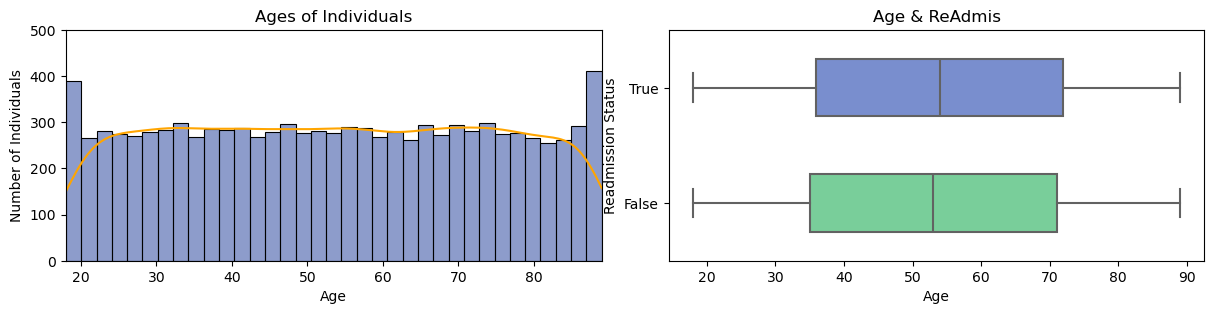

In [11]:
print('\n')
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

predictor = "Age"
p_min, p_max = (math.ceil(df[predictor].min()), math.ceil(df[predictor].max()))

sns.histplot(ax = axs[0],
             data = df,
             x = predictor,
             bins = int((p_max - p_min) / 2),
             binrange = (p_min, p_max),
             kde = True,
             color = "#1C3B98",
             edgecolor = "#000000")
axs[0].lines[0].set_color(color = "orange")
axs[0].lines[0].set_alpha(alpha = 1)
axs[0].set_xlim(left = p_min, right = p_max)
axs[0].set_ylim(bottom = 0, top = 500)

axs[0].set_title(str(predictor) + "s of Individuals")
axs[0].set_xlabel(str(predictor))
axs[0].set_ylabel("Number of Individuals")


sns.boxplot(
    ax = axs[1],
    x = predictor,
    y = response,
    data = df,
    orient = "h",
    order = [True, False],
    palette = {True: "#6B87DC", False: "#6BDC97"},
    width = 0.5
)
axs[1].set_title(str(predictor) + " & " + str(response))
axs[1].set_xlabel(str(predictor))
axs[1].set_ylabel("Readmission Status")

plt.tight_layout(pad = 0.2)

plt.show()

**Asthma**:

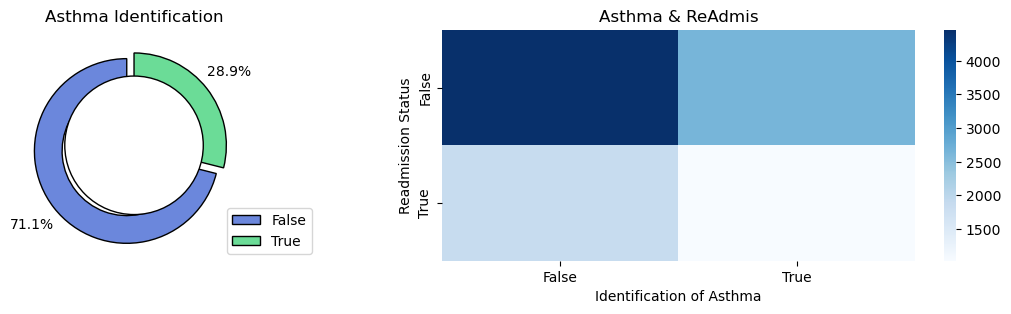

In [12]:
print('\n')
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

predictor = "Asthma"
p_min, p_max = (math.ceil(df[predictor].min()), math.ceil(df[predictor].max()))

values = df[predictor].value_counts()
labels = values.index

axs[0].pie(x = values,
           colors = ["#6B87DC", "#6BDC97"],
           startangle = 90, 
           autopct = '%1.1f%%',
           pctdistance = 1.3,
           wedgeprops = {"width": 0.3, "edgecolor": 'black'},
           explode = (0.1, 0)
            )
axs[0].add_artist(plt.Circle((0, 0), 0.75, fc = "white", edgecolor = "black"))

axs[0].set_title(str(predictor) + " Identification")
axs[0].legend(loc = "lower right", 
              bbox_to_anchor=(1.3, 0, 0, 1), 
              labels = labels)

contingency = pd.crosstab(df[predictor], df[response])
sns.heatmap(
    ax = axs[1],
    data = contingency,
    cmap = "Blues",
)
axs[1].set_title(str(predictor) + " & " + str(response))
axs[1].set_xlabel("Identification of " + str(predictor))
axs[1].set_ylabel("Readmission Status")

plt.tight_layout(pad = 0.2)

plt.show()

**Anxiety**:

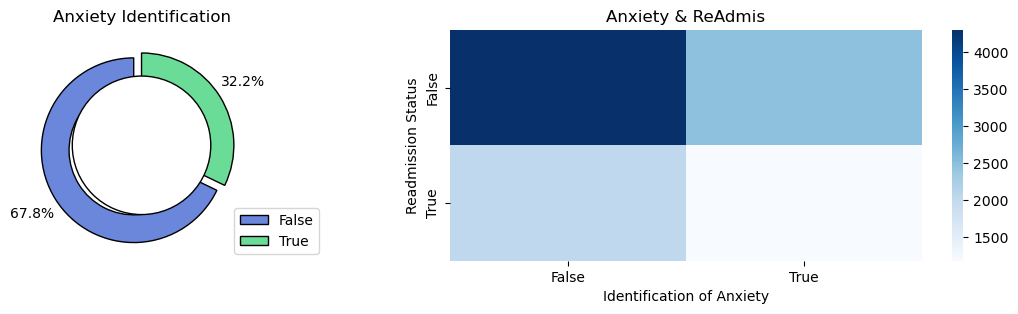

In [13]:
print('\n')
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

predictor = "Anxiety"
p_min, p_max = (math.ceil(df[predictor].min()), math.ceil(df[predictor].max()))

values = df[predictor].value_counts()
labels = values.index

axs[0].pie(x = values,
           colors = ["#6B87DC", "#6BDC97"],
           startangle = 90, 
           autopct = '%1.1f%%',
           pctdistance = 1.3,
           wedgeprops = {"width": 0.3, "edgecolor": 'black'},
           explode = (0.1, 0)
            )
axs[0].add_artist(plt.Circle((0, 0), 0.75, fc = "white", edgecolor = "black"))

axs[0].set_title(str(predictor) + " Identification")
axs[0].legend(loc = "lower right", 
              bbox_to_anchor=(1.3, 0, 0, 1), 
              labels = labels)

contingency = pd.crosstab(df[predictor], df[response])
sns.heatmap(
    ax = axs[1],
    data = contingency,
    cmap = "Blues",
)
axs[1].set_title(str(predictor) + " & " + str(response))
axs[1].set_xlabel("Identification of " + str(predictor))
axs[1].set_ylabel("Readmission Status")

plt.tight_layout(pad = 0.2)

plt.show()

**BackPain**:

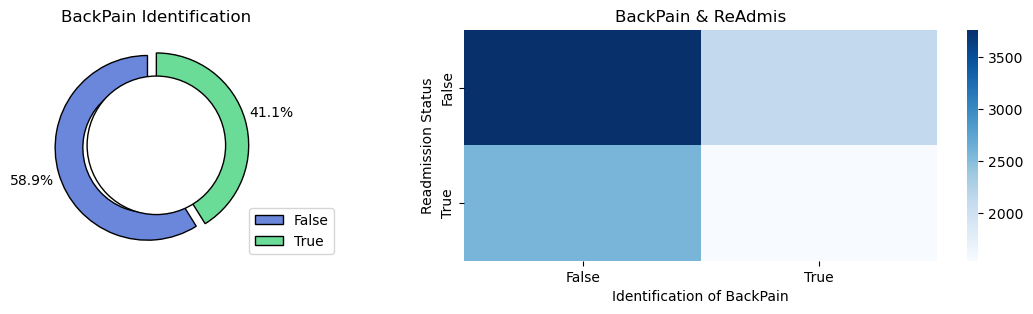

In [14]:
print('\n')
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

predictor = "BackPain"
p_min, p_max = (math.ceil(df[predictor].min()), math.ceil(df[predictor].max()))

values = df[predictor].value_counts()
labels = values.index

axs[0].pie(x = values,
           colors = ["#6B87DC", "#6BDC97"],
           startangle = 90, 
           autopct = '%1.1f%%',
           pctdistance = 1.3,
           wedgeprops = {"width": 0.3, "edgecolor": 'black'},
           explode = (0.1, 0)
            )
axs[0].add_artist(plt.Circle((0, 0), 0.75, fc = "white", edgecolor = "black"))

axs[0].set_title(str(predictor) + " Identification")
axs[0].legend(loc = "lower right", 
              bbox_to_anchor=(1.3, 0, 0, 1), 
              labels = labels)

contingency = pd.crosstab(df[predictor], df[response])
sns.heatmap(
    ax = axs[1],
    data = contingency,
    cmap = "Blues",
)
axs[1].set_title(str(predictor) + " & " + str(response))
axs[1].set_xlabel("Identification of " + str(predictor))
axs[1].set_ylabel("Readmission Status")

plt.tight_layout(pad = 0.2)

plt.show()

**Children**:

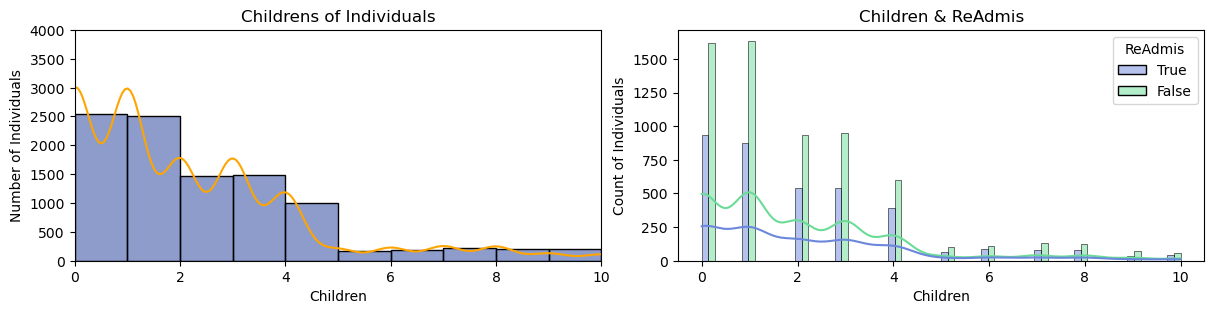

In [52]:
print('\n')
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

predictor = "Children"
p_min, p_max = (math.ceil(df[predictor].min()), math.ceil(df[predictor].max()))

sns.histplot(ax = axs[0],
             data = df,
             x = predictor,
             bins = 10,
             binrange = (p_min, p_max),
             kde = True,
             color = "#1C3B98",
             edgecolor = "#000000")
axs[0].lines[0].set_color(color = "orange")
axs[0].lines[0].set_alpha(alpha = 1)
axs[0].set_xlim(left = p_min, right = p_max)
axs[0].set_ylim(bottom = 0, top = 4000)

axs[0].set_title(str(predictor) + "s of Individuals")
axs[0].set_xlabel(str(predictor))
axs[0].set_ylabel("Number of Individuals")


sns.histplot(
    ax = axs[1],
    x = predictor,
    data = df,
    hue = response,
    hue_order = [True, False],
    multiple = "dodge",
    palette = {True: "#6B87DC", False: "#6BDC97"},
    kde = True
)
axs[1].set_title(str(predictor) + " & " + str(response))
axs[1].set_xlabel(str(predictor))
axs[1].set_ylabel("Count of Individuals")

plt.tight_layout(pad = 0.2)

plt.show()

**Complication_risk**:

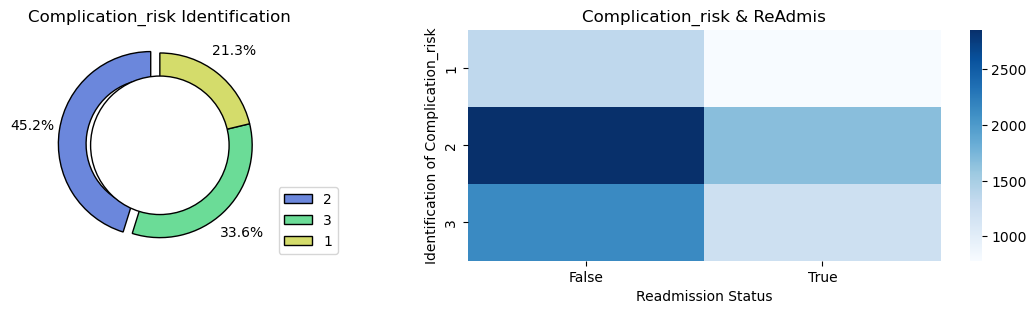

In [16]:
dict = {"Complication_risk": {"Low": 1, "Medium": 2, "High": 3}}
df.replace(dict, inplace = True)

print('\n')
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

predictor = "Complication_risk"
p_min, p_max = (math.ceil(df[predictor].min()), math.ceil(df[predictor].max()))

values = df[predictor].value_counts()
labels = values.index

axs[0].pie(x = values,
           colors = ["#6B87DC", "#6BDC97", "#D4DC6B"],
           startangle = 90, 
           autopct = '%1.1f%%',
           pctdistance = 1.3,
           wedgeprops = {"width": 0.3, "edgecolor": 'black'},
           explode = (0.1, 0, 0)
            )
axs[0].add_artist(plt.Circle((0, 0), 0.75, fc = "white", edgecolor = "black"))

axs[0].set_title(str(predictor) + " Identification")
axs[0].legend(loc = "lower right", 
              bbox_to_anchor=(1.3, 0, 0, 1), 
              labels = labels)

contingency = pd.crosstab(df[predictor], df[response])
sns.heatmap(
    ax = axs[1],
    data = contingency,
    cmap = "Blues",
)
axs[1].set_title(str(predictor) + " & " + str(response))
axs[1].set_ylabel("Identification of " + str(predictor))
axs[1].set_xlabel("Readmission Status")

plt.tight_layout(pad = 0.2)

plt.show()

**Diabetes**:

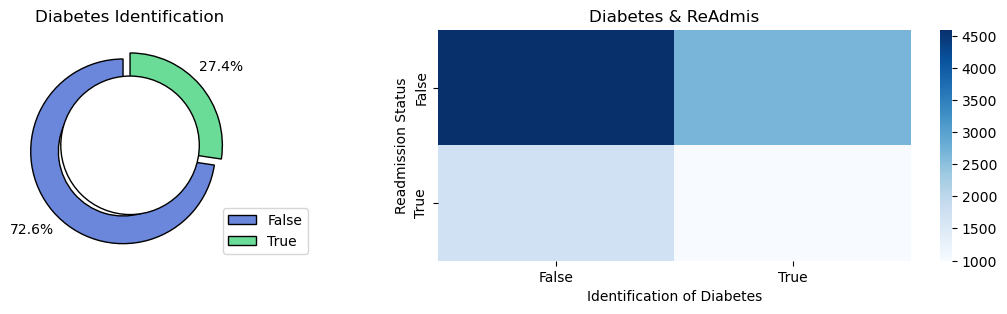

In [17]:
print('\n')
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

predictor = "Diabetes"
p_min, p_max = (math.ceil(df[predictor].min()), math.ceil(df[predictor].max()))

values = df[predictor].value_counts()
labels = values.index

axs[0].pie(x = values,
           colors = ["#6B87DC", "#6BDC97"],
           startangle = 90, 
           autopct = '%1.1f%%',
           pctdistance = 1.3,
           wedgeprops = {"width": 0.3, "edgecolor": 'black'},
           explode = (0.1, 0)
            )
axs[0].add_artist(plt.Circle((0, 0), 0.75, fc = "white", edgecolor = "black"))

axs[0].set_title(str(predictor) + " Identification")
axs[0].legend(loc = "lower right", 
              bbox_to_anchor=(1.3, 0, 0, 1), 
              labels = labels)

contingency = pd.crosstab(df[predictor], df[response])
sns.heatmap(
    ax = axs[1],
    data = contingency,
    cmap = "Blues",
)
axs[1].set_title(str(predictor) + " & " + str(response))
axs[1].set_xlabel("Identification of " + str(predictor))
axs[1].set_ylabel("Readmission Status")

plt.tight_layout(pad = 0.2)
plt.show()

**Doc_visits**:

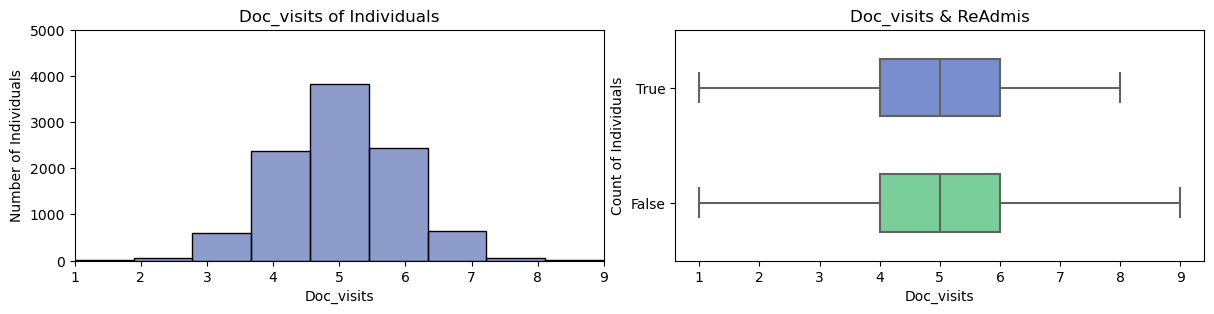

In [53]:
print('\n')
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

predictor = "Doc_visits"
p_min, p_max = (math.ceil(df[predictor].min()), math.ceil(df[predictor].max()))

sns.histplot(
    ax = axs[0],
    data = df,
    x = predictor,
    bins = 9,
    binrange = (p_min, p_max),
    color = "#1C3B98",
    edgecolor = "#000000",
    alpha = 0.5
)
axs[0].set_xlim(left = p_min, right = p_max)
axs[0].set_ylim(bottom = 0, top = 5000)

axs[0].set_title(str(predictor) + " of Individuals")
axs[0].set_xlabel(str(predictor))
axs[0].set_ylabel("Number of Individuals")


sns.boxplot(
    ax = axs[1],
    x = predictor,
    y = response,
    data = df,
    orient = "h",
    order = [True, False],
    palette = {True: "#6B87DC", False: "#6BDC97"},
    width = 0.5
)
axs[1].set_title(str(predictor) + " & " + str(response))
axs[1].set_xlabel(str(predictor))
axs[1].set_ylabel("Count of Individuals")

plt.tight_layout(pad = 0.2)

plt.show()

**Full_meals_eaten**:

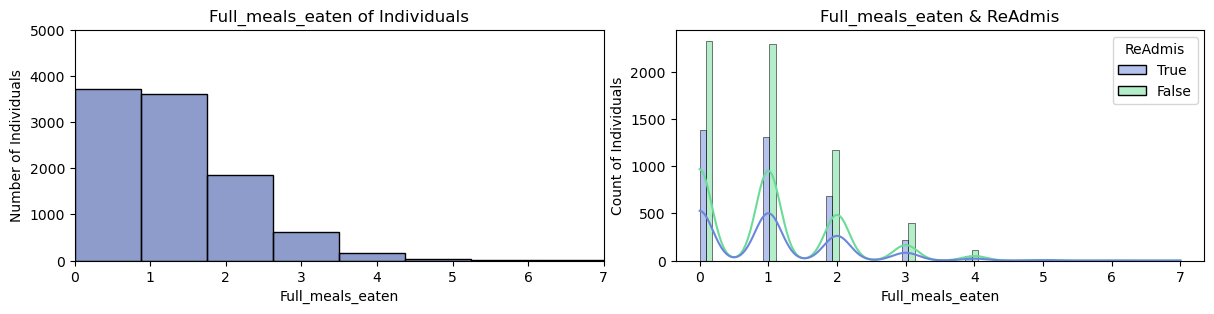

In [54]:
print('\n')
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

predictor = "Full_meals_eaten"
p_min, p_max = (math.ceil(df[predictor].min()), math.ceil(df[predictor].max()))

sns.histplot(
    ax = axs[0],
    data = df,
    x = predictor,
    bins = 8,
    binrange = (p_min, p_max),
    color = "#1C3B98",
    edgecolor = "#000000",
    alpha = 0.5
)
axs[0].set_xlim(left = p_min, right = p_max)
axs[0].set_ylim(bottom = 0, top = 5000)

axs[0].set_title(str(predictor) + " of Individuals")
axs[0].set_xlabel(str(predictor))
axs[0].set_ylabel("Number of Individuals")


sns.histplot(
    ax = axs[1],
    x = predictor,
    data = df,
    hue = response,
    hue_order = [True, False],
    multiple = "dodge",
    palette = {True: "#6B87DC", False: "#6BDC97"},
    kde = True
)
axs[1].set_title(str(predictor) + " & " + str(response))
axs[1].set_xlabel(str(predictor))
axs[1].set_ylabel("Count of Individuals")

plt.tight_layout(pad = 0.2)

plt.show()

**Gender**:

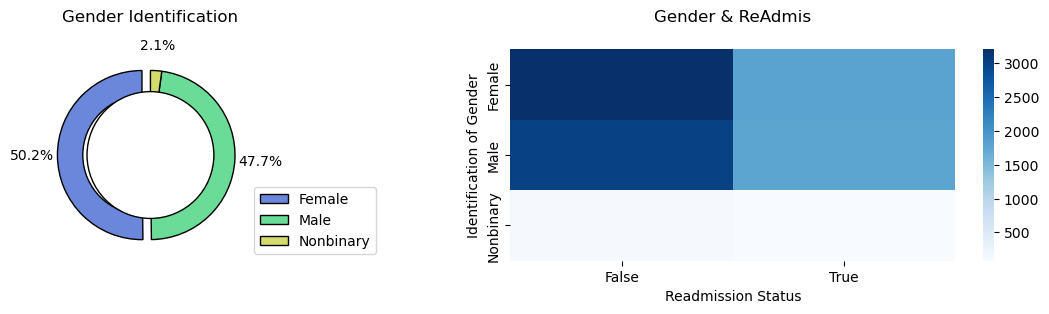

In [20]:
print('\n')
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

predictor = "Gender"

values = df[predictor].value_counts()
labels = values.index

axs[0].pie(x = values,
           colors = ["#6B87DC", "#6BDC97", "#D4DC6B"],
           startangle = 90, 
           autopct = '%1.1f%%',
           pctdistance = 1.3,
           wedgeprops = {"width": 0.3, "edgecolor": 'black'},
           explode = (0.1, 0, 0)
            )
axs[0].add_artist(plt.Circle((0, 0), 0.75, fc = "white", edgecolor = "black"))

axs[0].set_title(str(predictor) + " Identification", pad = 20)
axs[0].legend(loc = "lower right", 
              bbox_to_anchor=(1.6, 0, 0, 1), 
              labels = labels)

contingency = pd.crosstab(df[predictor], df[response])
sns.heatmap(
    ax = axs[1],
    data = contingency,
    cmap = "Blues",
)
axs[1].set_title(str(predictor) + " & " + str(response), pad = 20)
axs[1].set_ylabel("Identification of " + str(predictor))
axs[1].set_xlabel("Readmission Status")

plt.tight_layout(pad = 0.2)

plt.show()

**Income**:

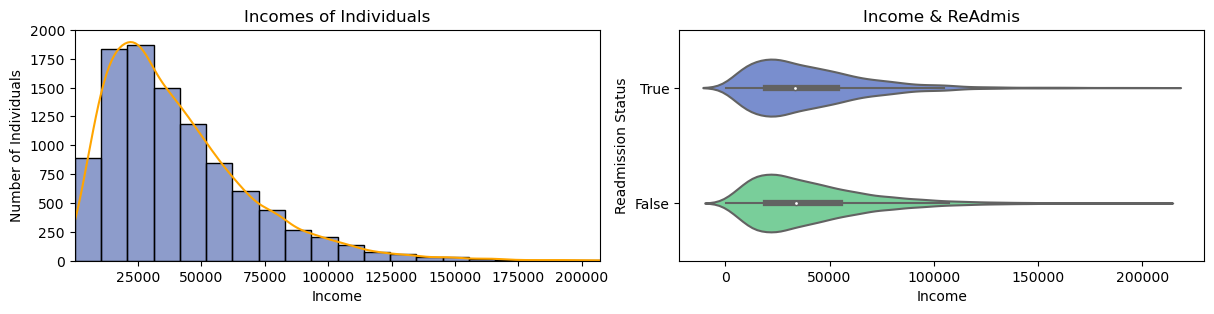

In [21]:
print('\n')
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

predictor = "Income"
p_min, p_max = (math.ceil(df[predictor].min()), math.ceil(df[predictor].max()))

sns.histplot(
    ax = axs[0],
    data = df,
    x = predictor,
    bins = 20,
    binrange = (p_min, p_max),
    kde = True,
    color = "#1C3B98",
    edgecolor = "#000000")
axs[0].lines[0].set_color(color = "orange")
axs[0].lines[0].set_alpha(alpha = 1)
axs[0].set_xlim(left = p_min, right = p_max)
axs[0].set_ylim(bottom = 0, top = 2000)

axs[0].set_title(str(predictor) + "s of Individuals")
axs[0].set_xlabel(str(predictor))
axs[0].set_ylabel("Number of Individuals")


sns.violinplot(
    ax = axs[1],
    x = predictor,
    y = response,
    data = df,
    orient = "h",
    order = [True, False],
    palette = {True: "#6B87DC", False: "#6BDC97"},
    width = 0.5
)
axs[1].set_title(str(predictor) + " & " + str(response))
axs[1].set_xlabel(str(predictor))
axs[1].set_ylabel("Readmission Status")

plt.tight_layout(pad = 0.2)

plt.show()

**Initial_admin**:

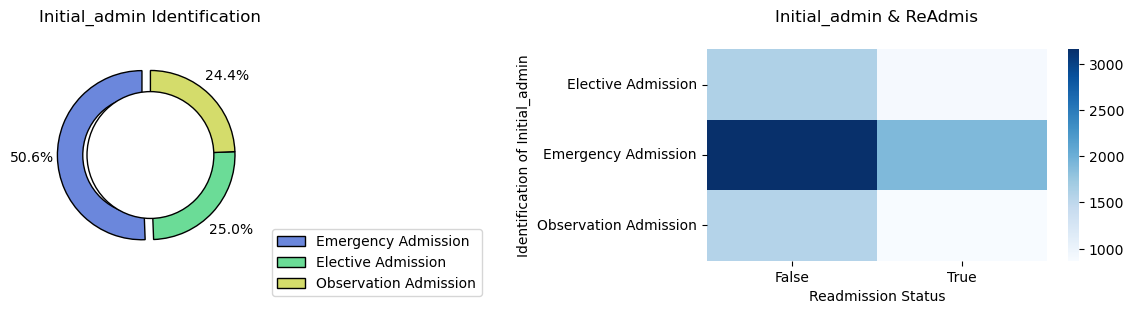

In [22]:
print('\n')
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

predictor = "Initial_admin"

values = df[predictor].value_counts()
labels = values.index

axs[0].pie(x = values,
           colors = ["#6B87DC", "#6BDC97", "#D4DC6B"],
           startangle = 90, 
           autopct = '%1.1f%%',
           pctdistance = 1.3,
           wedgeprops = {"width": 0.3, "edgecolor": 'black'},
           explode = (0.1, 0, 0)
            )
axs[0].add_artist(plt.Circle((0, 0), 0.75, fc = "white", edgecolor = "black"))

axs[0].set_title(str(predictor) + " Identification", pad = 20)
axs[0].legend(loc = "lower right", 
              bbox_to_anchor=(2.1, -0.2, 0, 1), 
              labels = labels)

contingency = pd.crosstab(df[predictor], df[response])
sns.heatmap(
    ax = axs[1],
    data = contingency,
    cmap = "Blues",
)
axs[1].set_title(str(predictor) + " & " + str(response), pad = 20)
axs[1].set_ylabel("Identification of " + str(predictor))
axs[1].set_xlabel("Readmission Status")

plt.tight_layout(pad = 0.2)

plt.show()

**Initial_days**:

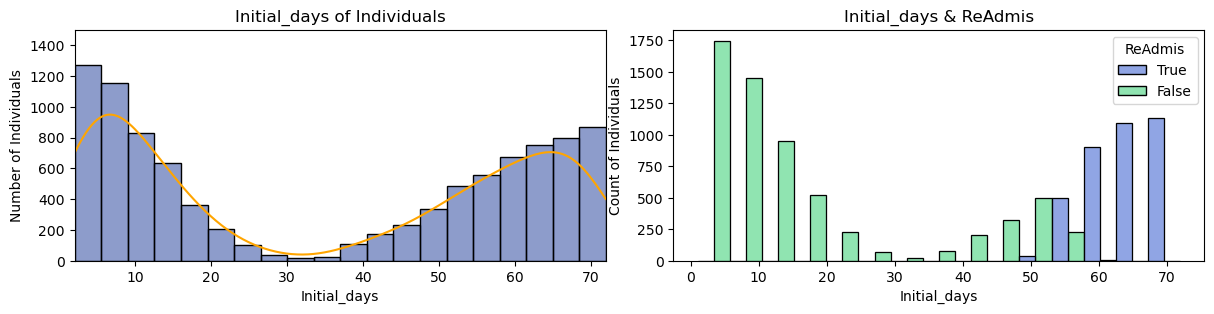

In [55]:
print('\n')
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

predictor = "Initial_days"
p_min, p_max = (math.ceil(df[predictor].min()), math.ceil(df[predictor].max()))

sns.histplot(
    ax = axs[0],
    data = df,
    x = predictor,
    bins = 20,
    binrange = (p_min, p_max),
    kde = True,
    color = "#1C3B98",
    edgecolor = "#000000")
axs[0].lines[0].set_color(color = "orange")
axs[0].lines[0].set_alpha(alpha = 1)
axs[0].set_xlim(left = p_min, right = p_max)
axs[0].set_ylim(bottom = 0, top = 1500)

axs[0].set_title(str(predictor) + " of Individuals")
axs[0].set_xlabel(str(predictor))
axs[0].set_ylabel("Number of Individuals")


sns.histplot(
    ax = axs[1],
    x = predictor,
    data = df,
    hue = response,
    hue_order = [True, False],
    multiple = "dodge",
    palette = {True: "#6B87DC", False: "#6BDC97"}
)
axs[1].set_title(str(predictor) + " & " + str(response))
axs[1].set_xlabel(str(predictor))
axs[1].set_ylabel("Count of Individuals")

plt.tight_layout(pad = 0.2)

plt.show()

**Overweight**:

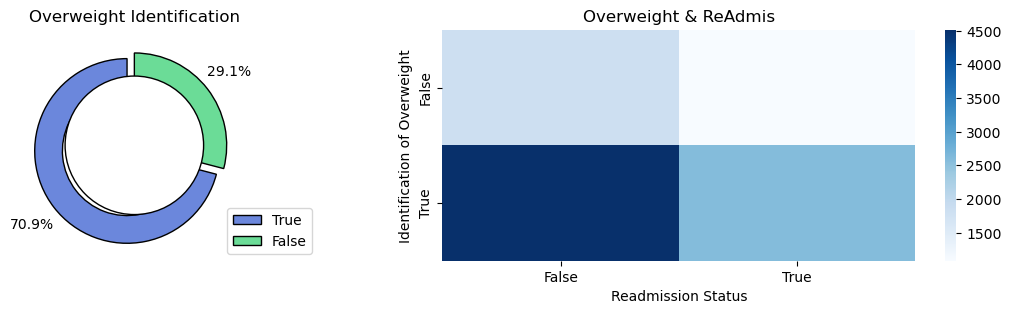

In [24]:
print('\n')
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

predictor = "Overweight"
p_min, p_max = (math.ceil(df[predictor].min()), math.ceil(df[predictor].max()))

values = df[predictor].value_counts()
labels = values.index

axs[0].pie(x = values,
           colors = ["#6B87DC", "#6BDC97"],
           startangle = 90, 
           autopct = '%1.1f%%',
           pctdistance = 1.3,
           wedgeprops = {"width": 0.3, "edgecolor": 'black'},
           explode = (0.1, 0)
            )
axs[0].add_artist(plt.Circle((0, 0), 0.75, fc = "white", edgecolor = "black"))

axs[0].set_title(str(predictor) + " Identification")
axs[0].legend(loc = "lower right", 
              bbox_to_anchor=(1.3, 0, 0, 1), 
              labels = labels)

contingency = pd.crosstab(df[predictor], df[response])
sns.heatmap(
    ax = axs[1],
    data = contingency,
    cmap = "Blues",
)
axs[1].set_title(str(predictor) + " & " + str(response))
axs[1].set_ylabel("Identification of " + str(predictor))
axs[1].set_xlabel("Readmission Status")

plt.tight_layout(pad = 0.2)
plt.show()

**Services**:

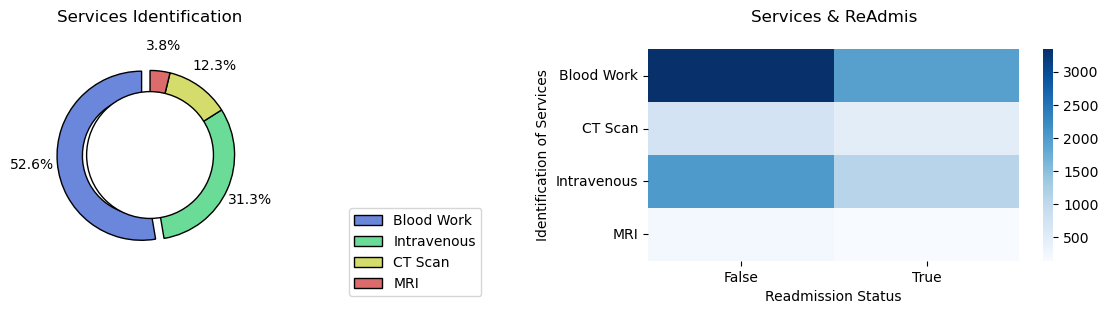

In [25]:
print('\n')
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

predictor = "Services"

values = df[predictor].value_counts()
labels = values.index

axs[0].pie(x = values,
           colors = ["#6B87DC", "#6BDC97", "#D4DC6B", "#DC6B6B"],
           startangle = 90, 
           autopct = '%1.1f%%',
           pctdistance = 1.3,
           wedgeprops = {"width": 0.3, "edgecolor": 'black'},
           explode = (0.1, 0, 0, 0)
            )
axs[0].add_artist(plt.Circle((0, 0), 0.75, fc = "white", edgecolor = "black"))

axs[0].set_title(str(predictor) + " Identification", pad = 20)
axs[0].legend(loc = "lower right", 
              bbox_to_anchor=(2.1, -0.2, 0, 1), 
              labels = labels)

contingency = pd.crosstab(df[predictor], df[response])
sns.heatmap(
    ax = axs[1],
    data = contingency,
    cmap = "Blues",
)
axs[1].set_title(str(predictor) + " & " + str(response), pad = 20)
axs[1].set_ylabel("Identification of " + str(predictor))
axs[1].set_xlabel("Readmission Status")

plt.tight_layout(pad = 0.2)

plt.show()

**VitD_levels**:

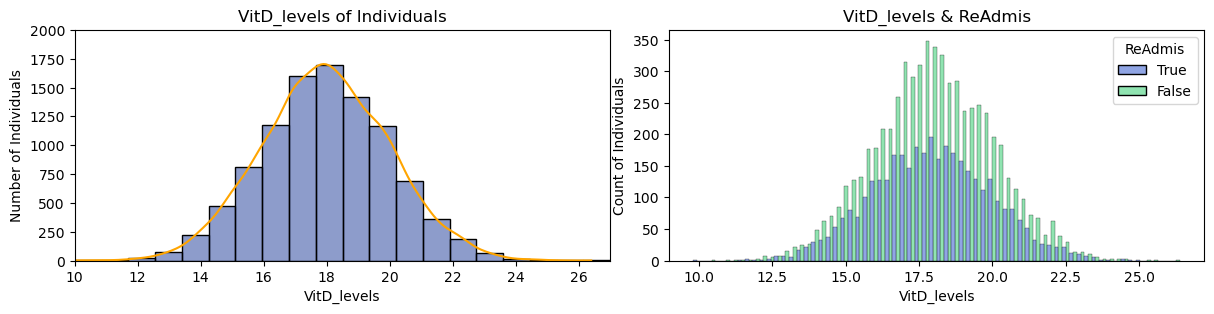

In [56]:
print('\n')
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

predictor = "VitD_levels"
p_min, p_max = (math.ceil(df[predictor].min()), math.ceil(df[predictor].max()))

sns.histplot(
    ax = axs[0],
    data = df,
    x = predictor,
    bins = 20,
    binrange = (p_min, p_max),
    kde = True,
    color = "#1C3B98",
    edgecolor = "#000000")
axs[0].lines[0].set_color(color = "orange")
axs[0].lines[0].set_alpha(alpha = 1)
axs[0].set_xlim(left = p_min, right = p_max)
axs[0].set_ylim(bottom = 0, top = 2000)

axs[0].set_title(str(predictor) + " of Individuals")
axs[0].set_xlabel(str(predictor))
axs[0].set_ylabel("Number of Individuals")


sns.histplot(
    ax = axs[1],
    x = predictor,
    data = df,
    hue = response,
    hue_order = [True, False],
    multiple = "dodge",
    palette = {True: "#6B87DC", False: "#6BDC97"}
)
axs[1].set_title(str(predictor) + " & " + str(response))
axs[1].set_xlabel(str(predictor))
axs[1].set_ylabel("Count of Individuals")

plt.tight_layout(pad = 0.2)

plt.show()

**Dependent Variable/Response**:

**ReAdmis**:

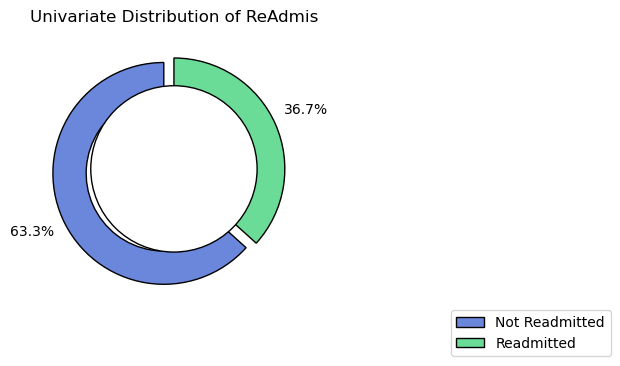

In [27]:
print('\n')
fig, axs = plt.subplots(1, 1, figsize=(20, 20))


r_min, r_max = math.ceil(df[response].min()), math.ceil(df[response].max())

values = df[response].value_counts()
labels = values.index

axs.pie(x = values,
           colors = ["#6B87DC", "#6BDC97"],
           startangle = 90, 
           autopct = '%1.1f%%',
           pctdistance = 1.3,
           wedgeprops = {"width": 0.3, "edgecolor": 'black'},
           explode = (0.1, 0)
            )
axs.add_artist(plt.Circle((0, 0), 0.75, fc = "white", edgecolor = "black"))

axs.set_title(str(predictor) + " Identification", pad = 20)
axs.legend(loc = "lower right", 
              bbox_to_anchor=(2.1, -0.2, 0, 1), 
              labels = ["Not Readmitted", "Readmitted"])

axs.set_title("Univariate Distribution of ReAdmis")

plt.tight_layout(pad = 0.2)

plt.show()

### C4: Data Transformation <a name="Data-Transformation"></a>

**Research Question**: "*What demographic factors, medical conditions and hospital service (independent) variables significantly influence the readmission (ReAdmis, dependent) of patients*?"

**Goals**: Data transformation is necessary in the analysis to appropriately involve the predictors and their relationship to the response variable. For numerical variables, normalization or other scaling techniques could be applied but after consideration may not be entirely necessary. To best assess our data, if a variable shows a skewed univariate distribution, it may be best to apply a log or square root transformation. For instance, we could implement the square root of the children or income predictors, however the benefit may not be significant in this instance. A new DataFrame, df_transformed, will store the transformed data. With numerical variables addressed, there also exists categorical predictors such as gender, complication_risk, overweight and more that will either require dummy variable creation or ordinal encoding for ease of processing in the logistical model. Dummy variables may create variable names with whitespace, these will need to be renamed. The following details the process and annotated code.

**Data Transformation DataFrame**:

In [28]:
# Copy existing DataFrame.
df_transformed = df.copy()

# Verify duplicate DataFrame.
if df.equals(df_transformed):
    print("\ndf_transformed successfully copied df.\n")


df_transformed successfully copied df.



**Skewed Distributions**:
- Children
- Full_meals_eaten
- Income

**Children**:

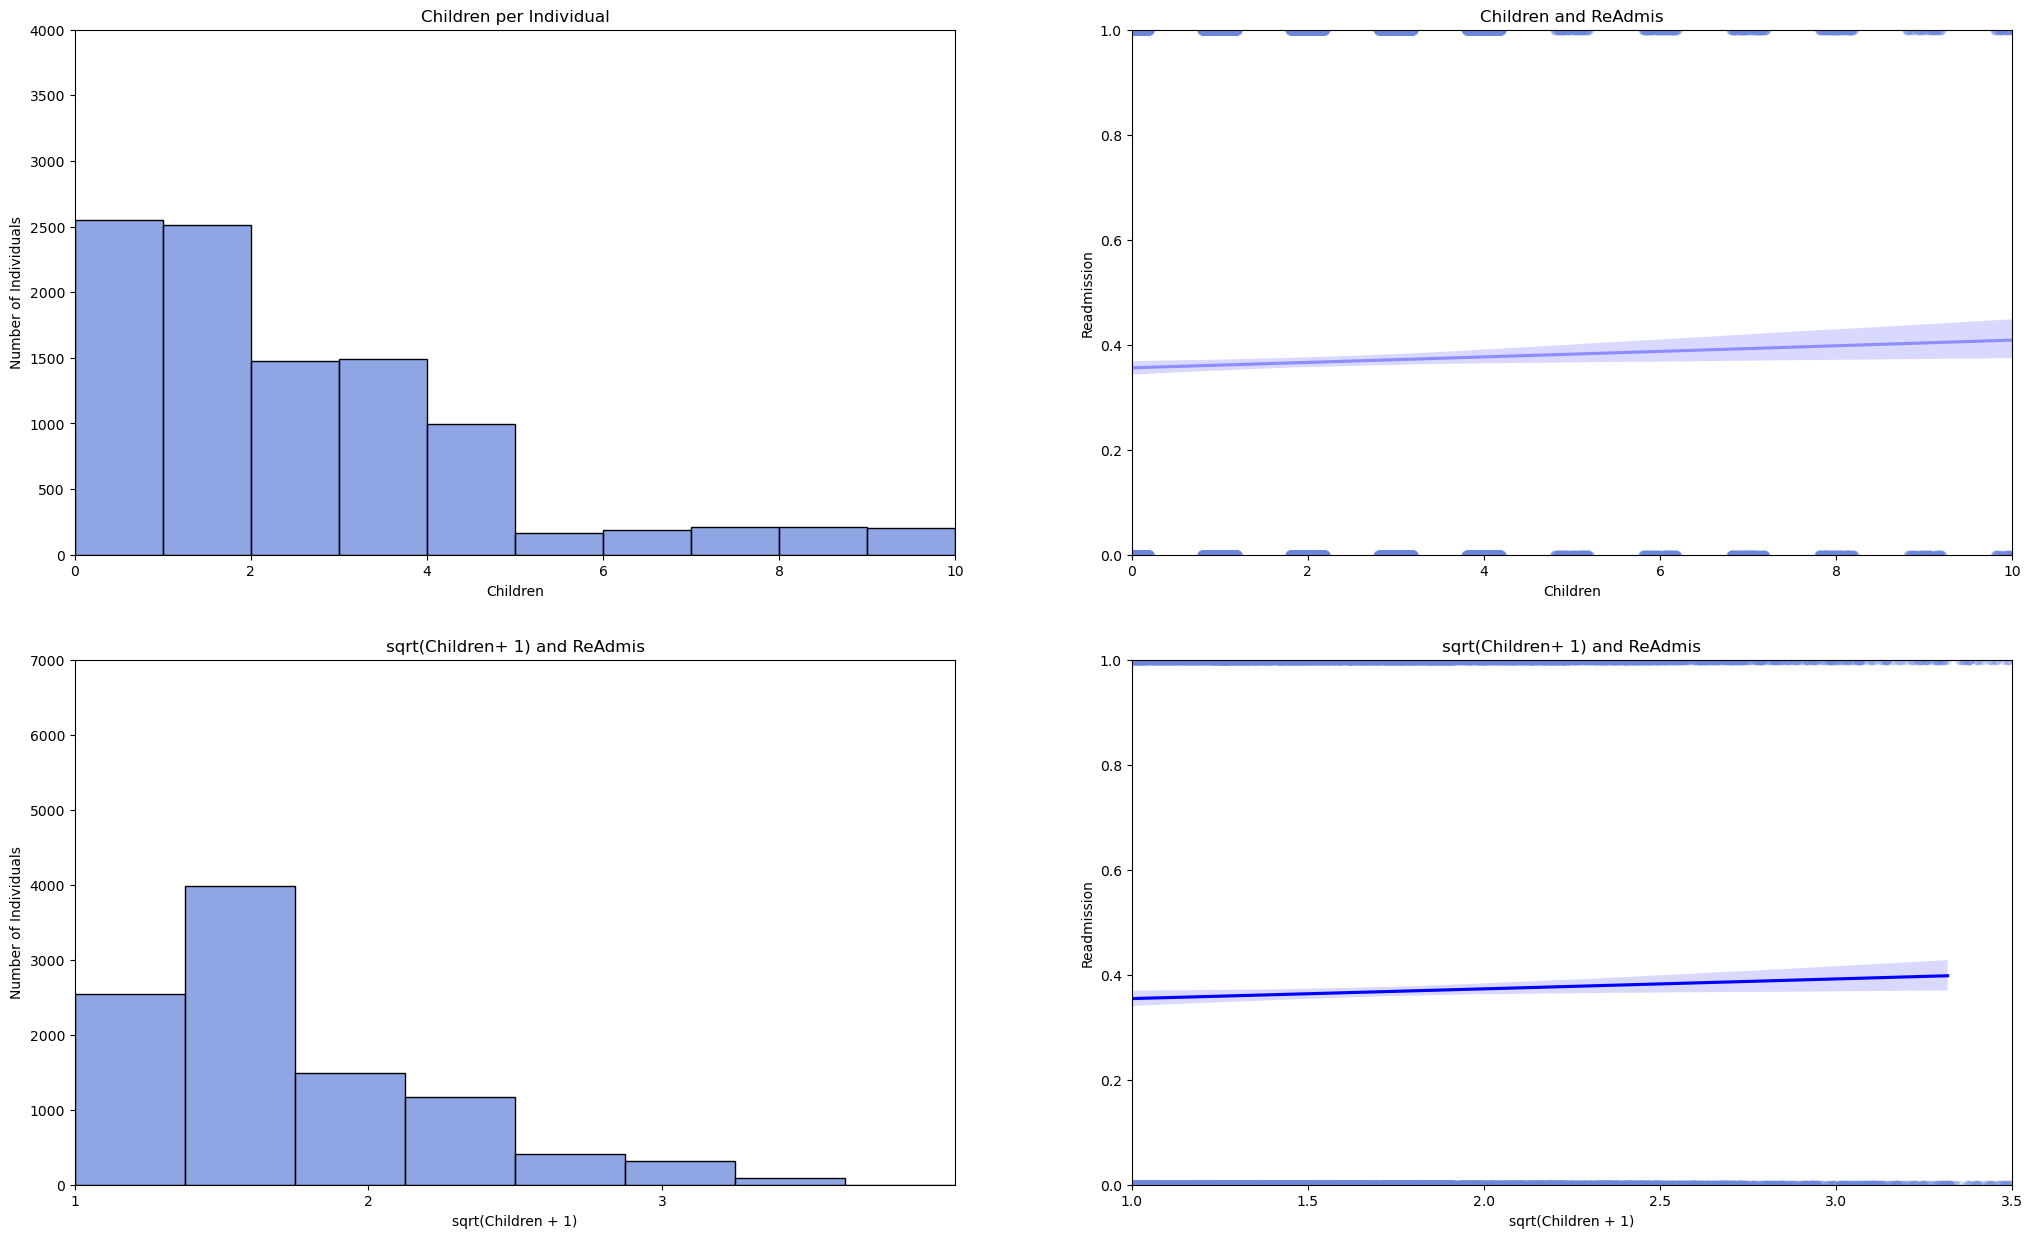

In [57]:
print('\n')

# Create the landscape for subplots.
fig, axs = plt.subplots(2, 2, figsize=(25, 15))

# Set the independent variable.
predictor = "Children"

# Do a sqrt transformation to see if absolutely necessary.
df_transformed[predictor] = np.sqrt(df[predictor] + 1)

# Set predictor min and max, set response min and max from originial DataFrame.
p_min, p_max, r_min, r_max = (math.ceil(df[predictor].min()), math.ceil(df[predictor].max()),
                             math.ceil(df[response].min()), math.ceil(df[response].max()))

# Histplot visual.
sns.histplot(ax = axs[0][0],
             data = df,
             x = predictor,
             bins = 10,
             binrange = (p_min, p_max),
             color = "#6B87DC",
             edgecolor = "#000000")
axs[0][0].set_xlim(left = p_min, right = p_max)
axs[0][0].set_ylim(bottom = 0, top = 4000)

axs[0][0].set_title(str(predictor) + " per Individual")
axs[0][0].set_xlabel(str(predictor))
axs[0][0].set_ylabel("Number of Individuals")

# Regression plot visual.
sns.regplot(ax = axs[0][1],
            data = df,
            x = predictor,
            y = response,
            color = "#6B87DC",
            x_jitter = 0.2,
            line_kws = {"color": "blue", "alpha": 0.35},
            scatter_kws = {"alpha": 0.2},
            logistic = True)
axs[0][1].set_xlim(left = p_min, right = p_max)
axs[0][1].set_ylim(bottom = 0, top = r_max + r_min)

axs[0][1].set_title(str(predictor) + " and " + str(response))
axs[0][1].set_xlabel(str(predictor))
axs[0][1].set_ylabel("Readmission")

# Set predictor min and max, set response min and max from encoded DataFrame.
p_min, p_max, r_min, r_max = (math.ceil(df_transformed[predictor].min()), math.ceil(df_transformed[predictor].max()),
                             math.ceil(df_transformed[response].min()), math.ceil(df_transformed[response].max()))

# Histplot visual.
sns.histplot(ax = axs[1][0],
             data = df_transformed,
             x = predictor,
             bins = 8,
             binrange = (p_min, p_max),
             color = "#6B87DC",
             edgecolor = "#000000")
axs[1][0].set_xlim(left = p_min, right = p_max)
axs[1][0].set_ylim(bottom = 0, top = 7000)
axs[1][0].set_xticks([1, 2, 3])


axs[1][0].set_title("sqrt(" + str(predictor) + "+ 1)" + " and " + str(response))
axs[1][0].set_xlabel("sqrt(" + str(predictor) + " + 1)")
axs[1][0].set_ylabel("Number of Individuals")

# Regression plot visual.
sns.regplot(ax = axs[1][1],
            data = df_transformed,
            x = predictor,
            y = response,
            color = "#6B87DC",
            x_jitter = 0.5,
            line_kws = {"color": "blue", "alpha": 1},
            scatter_kws = {"alpha": 0.2},
            logistic = True)
axs[1][1].set_xlim(left = p_min, right = 3.5)
axs[1][1].set_ylim(bottom = 0, top = r_max + r_min)
axs[1][1].set_xticks([1, 1.5, 2, 2.5, 3, 3.5])

axs[1][1].set_title("sqrt(" + str(predictor) + "+ 1)" + " and " + str(response))
axs[1][1].set_xlabel("sqrt(" + str(predictor) + " + 1)")
axs[1][1].set_ylabel("Readmission")

plt.show()

**Full_meals_eaten**:

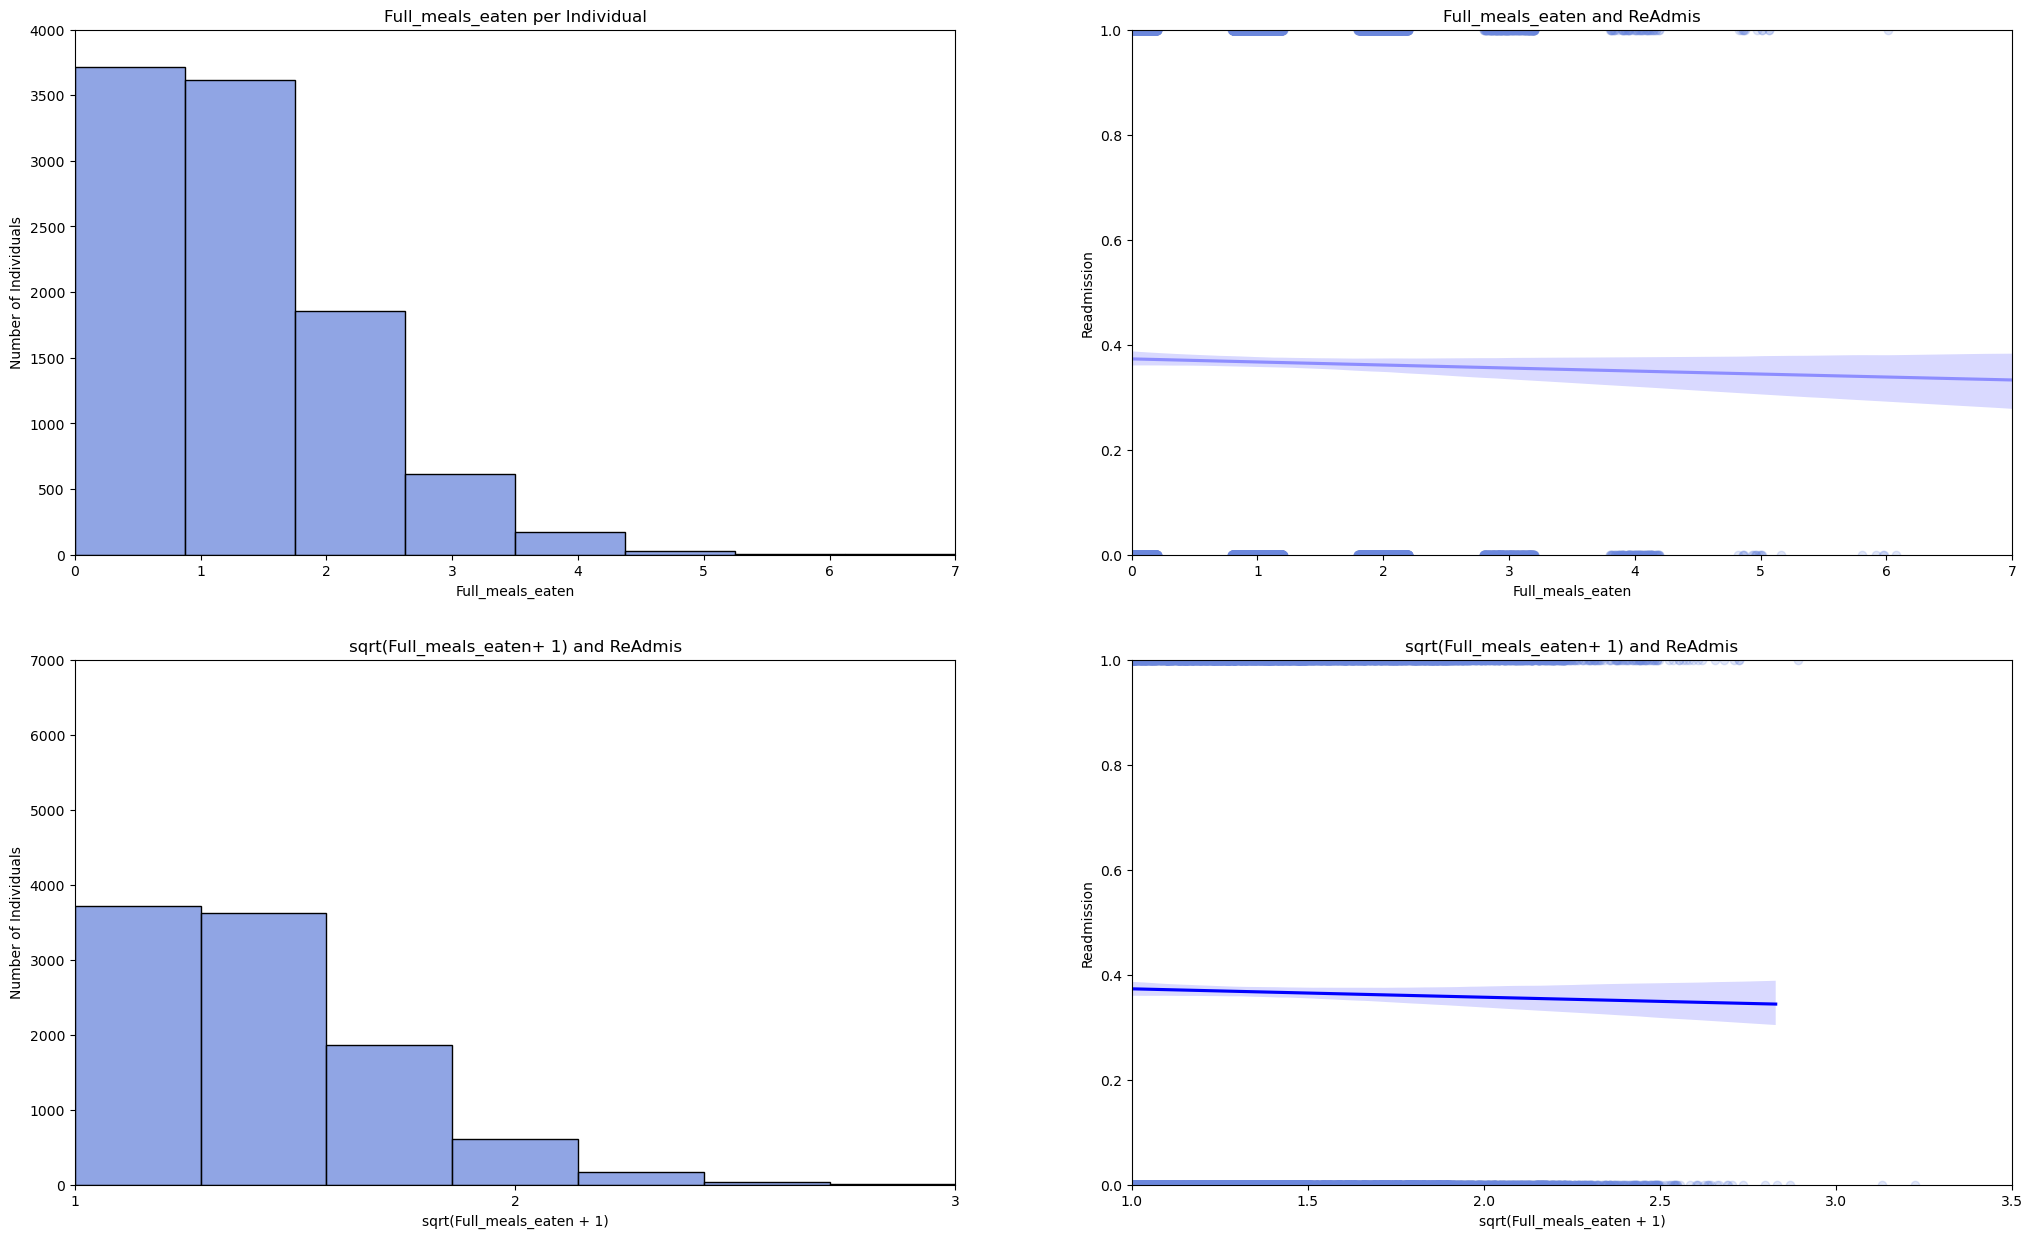

In [58]:
print('\n')

# Create the landscape for subplots.
fig, axs = plt.subplots(2, 2, figsize=(25, 15))

# Set the independent variable.
predictor = "Full_meals_eaten"

# Do a sqrt transformation to see if absolutely necessary.
df_transformed[predictor] = np.sqrt(df[predictor] + 1)

# Set predictor min and max, set response min and max from originial DataFrame.
p_min, p_max, r_min, r_max = (math.ceil(df[predictor].min()), math.ceil(df[predictor].max()),
                             math.ceil(df[response].min()), math.ceil(df[response].max()))

# Histplot visual.
sns.histplot(ax = axs[0][0],
             data = df,
             x = predictor,
             bins = 8,
             binrange = (p_min, p_max),
             color = "#6B87DC",
             edgecolor = "#000000")
axs[0][0].set_xlim(left = p_min, right = p_max)
axs[0][0].set_ylim(bottom = 0, top = 4000)

axs[0][0].set_title(str(predictor) + " per Individual")
axs[0][0].set_xlabel(str(predictor))
axs[0][0].set_ylabel("Number of Individuals")

# Regression plot visual.
sns.regplot(ax = axs[0][1],
            data = df,
            x = predictor,
            y = response,
            color = "#6B87DC",
            x_jitter = 0.2,
            line_kws = {"color": "blue", "alpha": 0.35},
            scatter_kws = {"alpha": 0.2},
            logistic = True)
axs[0][1].set_xlim(left = p_min, right = p_max)
axs[0][1].set_ylim(bottom = 0, top = r_max + r_min)

axs[0][1].set_title(str(predictor) + " and " + str(response))
axs[0][1].set_xlabel(str(predictor))
axs[0][1].set_ylabel("Readmission")

# Set predictor min and max, set response min and max from encoded DataFrame.
p_min, p_max, r_min, r_max = (math.ceil(df_transformed[predictor].min()), math.ceil(df_transformed[predictor].max()),
                             math.ceil(df_transformed[response].min()), math.ceil(df_transformed[response].max()))

# Histplot visual.
sns.histplot(ax = axs[1][0],
             data = df_transformed,
             x = predictor,
             bins = 7,
             binrange = (p_min, p_max),
             color = "#6B87DC",
             edgecolor = "#000000")
axs[1][0].set_xlim(left = p_min, right = p_max)
axs[1][0].set_ylim(bottom = 0, top = 7000)
axs[1][0].set_xticks([1, 2, 3])


axs[1][0].set_title("sqrt(" + str(predictor) + "+ 1)" + " and " + str(response))
axs[1][0].set_xlabel("sqrt(" + str(predictor) + " + 1)")
axs[1][0].set_ylabel("Number of Individuals")

# Regression plot visual.
sns.regplot(ax = axs[1][1],
            data = df_transformed,
            x = predictor,
            y = response,
            color = "#6B87DC",
            x_jitter = 0.5,
            line_kws = {"color": "blue", "alpha": 1},
            scatter_kws = {"alpha": 0.2},
            logistic = True)
axs[1][1].set_xlim(left = p_min, right = 3.5)
axs[1][1].set_ylim(bottom = 0, top = r_max + r_min)
axs[1][1].set_xticks([1, 1.5, 2, 2.5, 3, 3.5])

axs[1][1].set_title("sqrt(" + str(predictor) + "+ 1)" + " and " + str(response))
axs[1][1].set_xlabel("sqrt(" + str(predictor) + " + 1)")
axs[1][1].set_ylabel("Readmission")

plt.show()

**Income**:

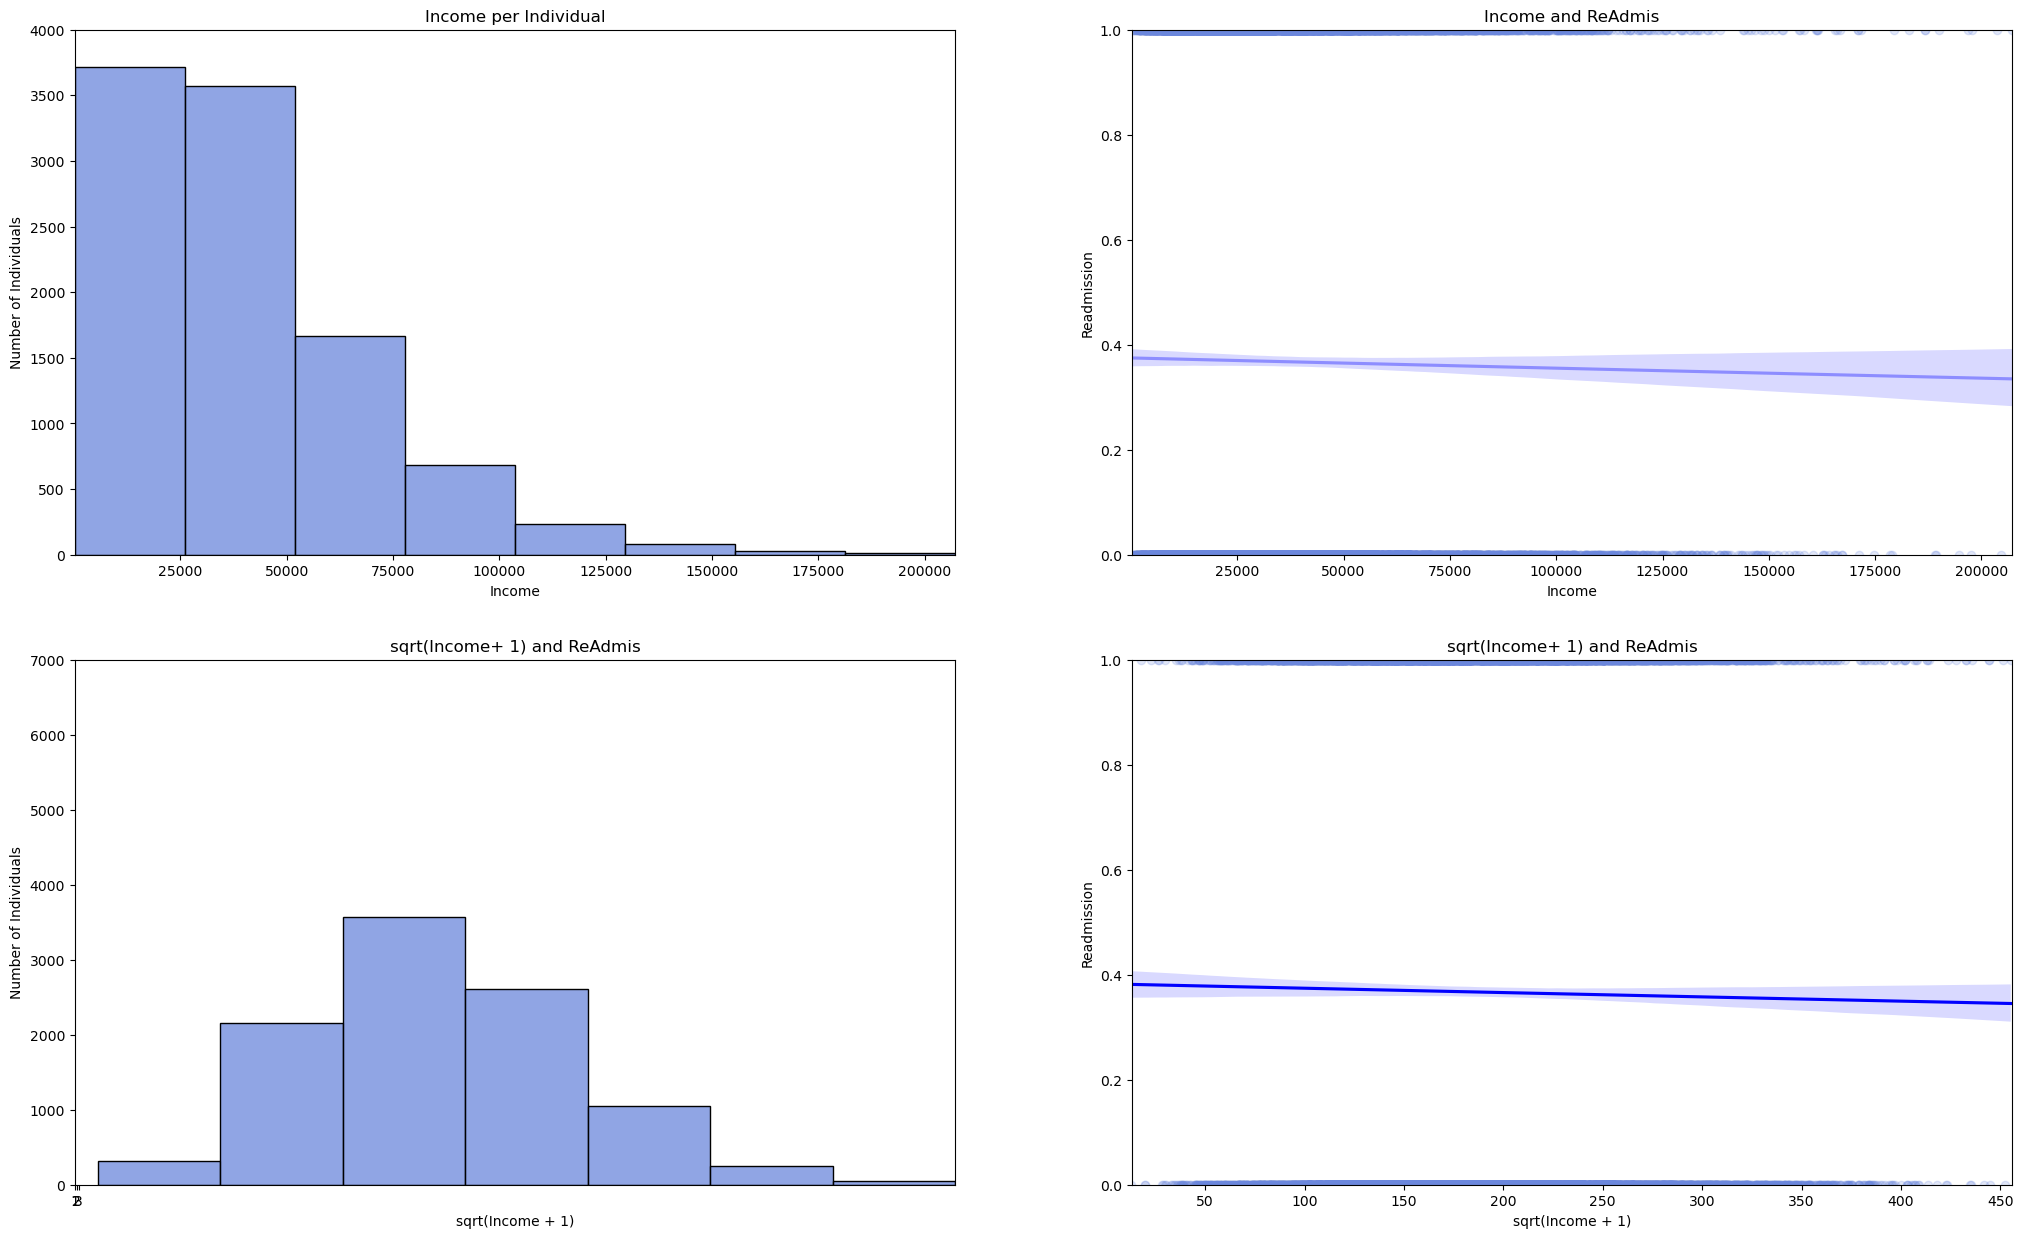

In [59]:
print('\n')

# Create the landscape for subplots.
fig, axs = plt.subplots(2, 2, figsize=(25, 15))

# Set the independent variable.
predictor = "Income"

# Do a sqrt transformation to see if absolutely necessary.
df_transformed[predictor] = np.sqrt(df[predictor] + 1)

# Set predictor min and max, set response min and max from originial DataFrame.
p_min, p_max, r_min, r_max = (math.ceil(df[predictor].min()), math.ceil(df[predictor].max()),
                             math.ceil(df[response].min()), math.ceil(df[response].max()))

# Histplot visual.
sns.histplot(ax = axs[0][0],
             data = df,
             x = predictor,
             bins = 8,
             binrange = (p_min, p_max),
             color = "#6B87DC",
             edgecolor = "#000000")
axs[0][0].set_xlim(left = p_min, right = p_max)
axs[0][0].set_ylim(bottom = 0, top = 4000)

axs[0][0].set_title(str(predictor) + " per Individual")
axs[0][0].set_xlabel(str(predictor))
axs[0][0].set_ylabel("Number of Individuals")

# Regression plot visual.
sns.regplot(ax = axs[0][1],
            data = df,
            x = predictor,
            y = response,
            color = "#6B87DC",
            x_jitter = 0.2,
            line_kws = {"color": "blue", "alpha": 0.35},
            scatter_kws = {"alpha": 0.2},
            logistic = True)
axs[0][1].set_xlim(left = p_min, right = p_max)
axs[0][1].set_ylim(bottom = 0, top = r_max + r_min)

axs[0][1].set_title(str(predictor) + " and " + str(response))
axs[0][1].set_xlabel(str(predictor))
axs[0][1].set_ylabel("Readmission")

# Set predictor min and max, set response min and max from encoded DataFrame.
p_min, p_max, r_min, r_max = (math.ceil(df_transformed[predictor].min()), math.ceil(df_transformed[predictor].max()),
                             math.ceil(df_transformed[response].min()), math.ceil(df_transformed[response].max()))

# Histplot visual.
sns.histplot(ax = axs[1][0],
             data = df_transformed,
             x = predictor,
             bins = 7,
             binrange = (p_min, p_max),
             color = "#6B87DC",
             edgecolor = "#000000")
axs[1][0].set_xlim(left = p_min, right = p_max)
axs[1][0].set_ylim(bottom = 0, top = 7000)
axs[1][0].set_xticks([1, 2, 3])


axs[1][0].set_title("sqrt(" + str(predictor) + "+ 1)" + " and " + str(response))
axs[1][0].set_xlabel("sqrt(" + str(predictor) + " + 1)")
axs[1][0].set_ylabel("Number of Individuals")

# Regression plot visual.
sns.regplot(ax = axs[1][1],
            data = df_transformed,
            x = predictor,
            y = response,
            color = "#6B87DC",
            x_jitter = 0.5,
            line_kws = {"color": "blue", "alpha": 1},
            scatter_kws = {"alpha": 0.2},
            logistic = True)
axs[1][1].set_xlim(left = p_min, right = p_max)
axs[1][1].set_ylim(bottom = 0, top = r_max + r_min)

axs[1][1].set_title("sqrt(" + str(predictor) + "+ 1)" + " and " + str(response))
axs[1][1].set_xlabel("sqrt(" + str(predictor) + " + 1)")
axs[1][1].set_ylabel("Readmission")

plt.show()

**NOTE**: Transforming the Children and Income column does get the data closer to a normal distribution, however we will leave these variables be for the initial model as they do not seem change much at least at eye-test level. If necessary these transformations may be included post-initial model.

In [32]:
# Reset encoded (was sqrt transformed to test) to original DataFrame values.
df_transformed['Children'] = df['Children']
# Reset encoded (was sqrt transformed to test) to original DataFrame values.
df_transformed['Full_meals_eaten'] = df['Full_meals_eaten']
# Reset encoded (was sqrt transformed to test) to original DataFrame values.
df_transformed['Income'] = df['Income']

**Data Encoding/Dummy Variables**: <br />

In [33]:
transform_info = pd.DataFrame({
    "Column": df_transformed.columns,
    "Non-Null Count": df_transformed.notnull().sum(),
    "Dtype": df_transformed.dtypes}).reset_index(drop = True)

transform_info

,Column,Non-Null Count,Dtype
0,CaseOrder,10000,int64
1,Customer_id,10000,object
2,Interaction,10000,object
3,UID,10000,object
4,City,10000,object
5,State,10000,object
6,County,10000,object
7,Zip,10000,int64
8,Lat,10000,float64
9,Lng,10000,float64


**Categorical Predictor Variables Assessment Needed**:
- Complication_risk
- Gender
- Initial_admin
- Services

**NOTE**: Other categorical variables are not included in this list as they only contain 2 distinct values. Dummy encoding makes k values into k-1 where appropriate. These variables needing assessment are listed above.

In [34]:
# Ordinal Variable, Complication_risk:
dict = {"Complication_risk": {"Low": 1, "Medium": 2, "High": 3}}
df_transformed.replace(dict, inplace = True)

In [35]:
# Nominal Variables:
dummy_to_be_cols = ['Gender', 'Initial_admin', 'Services']

# Pandas dummy transformation for columns. (Quite helpful!)
df_transformed = pd.get_dummies(df_transformed, columns=dummy_to_be_cols, drop_first = True)

In [36]:
transform_info = pd.DataFrame({
    "Column": df_transformed.columns,
    "Non-Null Count": df_transformed.notnull().sum(),
    "Dtype": df_transformed.dtypes}).reset_index(drop = True)

transform_info

,Column,Non-Null Count,Dtype
0,CaseOrder,10000,int64
1,Customer_id,10000,object
2,Interaction,10000,object
3,UID,10000,object
4,City,10000,object
5,State,10000,object
6,County,10000,object
7,Zip,10000,int64
8,Lat,10000,float64
9,Lng,10000,float64


**Variable Rename**:

In [37]:
# Rename columns for ease of access in model creation.
df_transformed = df_transformed.rename(columns = {"Initial_admin_Emergency Admission": "Initial_admin_Emergency_Admission",
                                                  "Initial_admin_Observation Admission": "Initial_admin_Observation_Admission",
                                                  "Services_CT Scan": "Services_CT_Scan"
                                                 })

In [38]:
df_transformed.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,Item6,Item7,Item8,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency_Admission,Initial_admin_Observation_Admission,Services_CT_Scan,Services_Intravenous,Services_MRI
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3,3,4,True,False,True,False,False,False,False
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4,3,3,False,False,True,False,False,True,False
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,4,3,3,False,False,False,False,False,False,False
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,5,5,5,True,False,False,False,False,False,False
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,3,4,3,False,False,False,False,True,False,False


### C5: Prepared Data Set <a name="Prepared-Data-Set"></a>

**Dataset**: The cleaned and transformed/encoded dataset is provided as "model_ready_medical_clean.csv" in the Python code below.

In [39]:
# Export cleaned dataset to csv.
df_transformed.to_csv("model_ready_medical_clean.csv", index = False)

## Model Comparison and Analysis <a name="Model-Comparison-and-Analysis"></a>

### D1: Initial Model <a name="Initial-Model"></a>

In [40]:
# Columns used for initial model from ones available in cleaned dataset/DataFrame.
model_int_cols = ['Age', 'Asthma', 'Anxiety', 'BackPain', 'Children',
                  'Complication_risk', 'Diabetes', 'Doc_visits', 'Full_meals_eaten',
                  'Gender_Male', 'Gender_Nonbinary', 'Income', 'Initial_admin_Emergency_Admission', 
                  'Initial_admin_Observation_Admission', 'Initial_days', 'Overweight', 'Services_CT_Scan', 
                  'Services_Intravenous', 'Services_MRI', 'VitD_levels']


# Dependent/Response variable.
y = df_transformed['ReAdmis']

# Independent/Predictor variables.
X = df_transformed[model_int_cols].astype(int)

# Create model from statsmodels Logit using Maximum Likelihood Estimation.
initial_model = sm.Logit(y, X).fit()

# Print summary of the initial model.
print(initial_model.summary())

# Copy for confusion matrix/accuracies.
X_init = X.copy()

Optimization terminated successfully.
         Current function value: 0.134968
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                  0.7947
Time:                        19:35:54   Log-Likelihood:                -1349.7
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Age                                    -0.0177      0.002

### D2: Justification of Model Reduction <a name="Justification-of-Model-Reduction"></a>

**Justification**: In this step, the goal is to justify the available methods to produce a reduced model that removes features that do not contribute significantly to the model or violates our assumptions. Recalling our assumptions in B1, we are sure the response is binary at this point. Additionally we are sure the observations are independent as seen by inspection of the dataset. Lastly, we check for multicollinearity which can be done via VIF (Variance Inflation Factor) score checking in each variable. We will remove the values with a high VIF, we will set the bar at a score of 5, as common practice. VIF is great for diagnosing multicollinearity but it does not consider the statistical significance of the independent variables and readmission status, ReAdmis. Backward elimination will remove the non statistically significant predictors (> 0.05 p-values) as they are each described from the initial model summary, column P>|z|.

### D3: Reduced Logistic Regression Model <a name="Reduced-Logistic-Regression-Model"></a>

**Methods**: *First VIF, then Backward Elimination*

**VIF**:

In [41]:
# Create DataFrame to show column and respective VIF.
df_vif = pd.DataFrame()

# Column Named "Column Name"!
df_vif['Column Name'] = X.columns
# And their respective VIF Scores.
df_vif['VIF Score'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Output the VIF DataFrame.
df_vif

,Column Name,VIF Score
0,Age,7.362702
1,Asthma,1.405475
2,Anxiety,1.471152
3,BackPain,1.695091
4,Children,1.933055
5,Complication_risk,8.849259
6,Diabetes,1.374397
7,Doc_visits,19.967644
8,Full_meals_eaten,1.984112
9,Gender_Male,1.930576


**Takeaways**: Variables "Age", "Children", "Complication_risk", "Doc_visits", "Full_meals_eaten", "Income" and "VitD_levels" have a VIF higher than an industy normal 5. This is where the bar was set and thus, these variables will be removed from the initial model as they contribute greatly to multicollinearity.

In [42]:
X = X.drop(["Age", "Children", "Complication_risk", "Doc_visits", "Full_meals_eaten", "Income", "VitD_levels"], axis = 1)

**Backward Elimination**: <br />
- Identify the independent variables to remove.
- Remove the variable with the highest p-value.
- Refit the model per removal.

**Identify the independent variables to remove**:

In [43]:
# Get list of p-values.
p_values = initial_model.pvalues[1:] 
p_values_df = pd.DataFrame({'Column Name': p_values.index, 'p_value': p_values.values})

# Which columns are not statistically significant?
p_values_df[p_values_df['p_value'] > 0.05]

,Column Name,p_value
2,BackPain,0.094102
3,Children,0.647647
5,Diabetes,0.076684
9,Gender_Nonbinary,0.995277
11,Initial_admin_Emergency_Admission,0.502708
15,Services_CT_Scan,0.200826
17,Services_MRI,0.778474


**Remove the variable with the highest p-value** & **Refit the model per removal**:

In [44]:
# Response.
y = df_transformed['ReAdmis']

# Remove until no more values > 0.05.
while True:
    # Recursive model fitting.
    wip_model = sm.Logit(y, X).fit()

    # Get new list of p-values.
    p_values = wip_model.pvalues.iloc[1:]

    #Highest p-value.
    max = p_values.max()

    if max > 0.05:
        # Variable to remove.
        ivar = p_values.idxmax()

        # Remove from DataFrame.
        X = X.drop(ivar, axis = 1)
    else:
        break

# Create reduced model from statsmodels Ordinary Least Squares linear reg.
reduced_model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.296339
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296339
         Iterations 7


**Both Models**:

**Initial Model**:

In [45]:
print(initial_model.summary())

                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                  0.7947
Time:                        19:35:54   Log-Likelihood:                -1349.7
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Age                                    -0.0177      0.002     -7.311      0.000      -0.022      -0.013
Asthma                                 -0.4734      0.10

**Reduced Model**:

In [46]:
print(reduced_model.summary())

                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                  0.5491
Time:                        19:35:54   Log-Likelihood:                -2963.4
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Asthma                                 -0.7231      0.073     -9.886      0.000      -0.866      -0.580
Anxiety                                -0.7939      0.07

### E1: Model Comparison <a name="Model-Comparison"></a>

**Model Comparison Metric**:

**Pseudo R-squared**:
- The initial model has a higher pseudo R-squared metric, suggesting a high level of variance in the readmission status is explained by the model's predictors. However it is important to note that "Possibly complete quasi-separation: A fraction 0.47 of observations can be perfectly predicted. This might indicate that there is complete quasi-separation."

- The Pseudo R-squared for the reduced model is 0.5491, which is lower than the initial model but still suggests a good fit to the data.

**LL-Null**:
- Both models are the same value, -6,572.9.

**LLR p-value**:
- Both models have the p-value 0.00 and are significantly better than a null model.

**Summary**: Pseudo R-squared is a metric used for model comparison, although it is not the only metric. A decrease in Pseudo R-squared in the reduced model suggests that it may not fit the data quite as good as the initial model. However, if the initial model may have been victim to overfitting due to quasi-separation, the reduced model could generalize better to new data despite the lower pseudo R-squared, where the pseudo R-squared value is still suggests a good fit to the data. Two additional model comparison metrics are the LL-Null, which remained the same, which serves as a bar for comparing the other two models themselves. The LLR p-value remains at 0.000 for both models, indicating that the models both are better than a null model with no independent variables/predictors.


### E2: Output and Calculations <a name="Output-and-Calculations"></a>

**Pseudo R-squared**:

In [47]:
print("Initial Model Pseudo R-squared: " + str(round(initial_model.prsquared, 3)))
print("Reduced Model Pseudo R-squared: " + str(round(reduced_model.prsquared, 3)))

Initial Model Pseudo R-squared: 0.795
Reduced Model Pseudo R-squared: 0.549


<br />**LL-Null**:

In [48]:
print("Initial Model Pseudo R-squared: " + str(round(initial_model.llnull, 3)))
print("Reduced Model Pseudo R-squared: " + str(round(reduced_model.llnull, 3)))

Initial Model Pseudo R-squared: -6572.852
Reduced Model Pseudo R-squared: -6572.852


<br />**LLR p-value**:

In [49]:
print("Initial Model Pseudo R-squared: " + str(round(initial_model.llr_pvalue, 3)))
print("Reduced Model Pseudo R-squared: " + str(round(reduced_model.llr_pvalue, 3)))

Initial Model Pseudo R-squared: 0.0
Reduced Model Pseudo R-squared: 0.0


<br />**Confusion Matrix**:

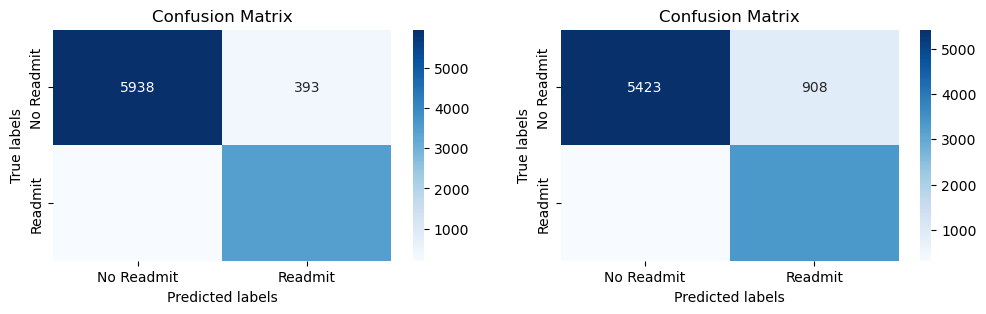

In [50]:
# Predict for the initial model.
resp_pred_prob_init = initial_model.predict(X_init)
resp_pred_init = (resp_pred_prob_init >= 0.5).astype(int)

# Predict for the reduced model.
resp_pred_prob_reduce = reduced_model.predict(X)
resp_pred_reduce = (resp_pred_prob_reduce >= 0.5).astype(int)

# Create confusion matrix.
confusion_initial = confusion_matrix(y, resp_pred_init)
confusion_reduced = confusion_matrix(y, resp_pred_reduce)

fig, axs = plt.subplots(1, 2, figsize=(12, 3))

sns.heatmap(
    ax = axs[0], 
    data = confusion_initial, 
    annot=True, 
    fmt = "g",
    cmap='Blues', 
    xticklabels=['No Readmit', 'Readmit'], 
    yticklabels=['No Readmit', 'Readmit']
)
axs[0].set_xlabel('Predicted labels')
axs[0].set_ylabel('True labels')
axs[0].set_title('Confusion Matrix')

sns.heatmap(
    ax = axs[1], 
    data = confusion_reduced, 
    annot=True,
    fmt = "g",
    cmap='Blues', 
    xticklabels=['No Readmit', 'Readmit'], 
    yticklabels=['No Readmit', 'Readmit']
)
axs[1].set_xlabel('Predicted labels')
axs[1].set_ylabel('True labels')
axs[1].set_title('Confusion Matrix')
plt.show()

In [51]:
# Calculate accuracies.
accuracy_initial = accuracy_score(y, resp_pred_init)
accuracy_reduced = accuracy_score(y, resp_pred_reduce)

print("Accuracy for Initial Model:", "{:.2%}".format(accuracy_initial))
print("Accuracy for Reduced Model:", "{:.2%}".format(accuracy_reduced))

Accuracy for Initial Model: 94.01%
Accuracy for Reduced Model: 87.76%


### E3: Code <a name="Code"></a>

**Code**: This Python notebook acts as both the presentation and executable error-free copy of the code used in supporting the implementation of the logistic regression models. (Python file.)

## Data Summary and Implications <a name="Data-Summary-and-Implications"></a>

### F1: Results <a name="Results"></a>

**Reduced Model Regression Equation**:

The regression equation is usually in the following format: <br /><br />
$Logit(p)= log(\frac{p}{1 - p}) = \beta_{0}  +  \beta_{1}X_{1}  +  \beta_{2}X_{2}  +  ... + \beta_{n}X_{n}$

Where

$p = \frac{e^{Logit(p)}} {1+e^{Logit(p)}}$

In this equation:
- $p$ is the probability of the dependent variable occurs, the probability of a patient being readmitted.
- $\beta_{0}$ is the y-intercept.
- $\beta_{i}$ are the coefficients of the independent variables.
- $X_{i}$ are the independent variables.

*Since no intercept was added, $\beta_{0}$ is 0.*

**Regression Equation**: <br /><br />
$probability(Readmission)$ = <br /><br />
$Logit(p) =$ <br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$-0.7231(Asthma) - 0.7939(Anxiety) - 0.8134(BackPain) - 0.6812(Diabetes)$<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$- 1.0003(Gender\_Male) - 0.6928(Gender\_Nonbinary) - 1.7270(Initial\_admin\_Emergency\_Admission)$<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$- 1.9427(Initial\_admin\_Observation\_Admission) + 0.1031(Initial\_days) - 1.7069(Overweight)$<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$- 0.6123(Services\_CT\_Scan) - 0.9814(Services\_Intravenous) - 0.8133(Services\_MRI)$

$-> \frac{e^{Logit(p)}} {1+e^{Logit(p)}}$

**Example**:
- *Asthma*: 1
- *Anxiety*: 0
- *BackPain*: 0
- *Diabetes*: 1
- *Gender_Male*: 1
- *Gender_Nonbinary*: 0
- *Initial_admin_Emergency_Admission*: 1
- *Initial_admin_Observation_Admission*: 0
- *Initial_days*: 30
- *Overweight*: 1
- *Services_CT_Scan*: 1
- *Services_Intravenous*: 0
- *Services_MRI*: 0

$Logit(p) =$ <br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$-0.7231(1) - 0.7939(0) - 0.8134(0) - 0.6812(1)$<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$- 1.0003(1) - 0.6928(0) - 1.7270(1)$<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$- 1.9427(0) + 0.1031(40) - 1.7069(1)$<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$- 0.6123(1) - 0.9814(0) - 0.8133(0)$

$probability(Readmission)$ =

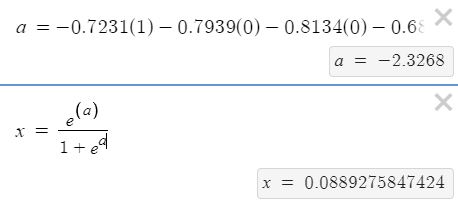

**Result of Example**: This observation has an 8.89% chance of readmission. Neat!

**Interpretation of Coefficients**:
- *Asthma*: Patients who are identified as having asthma are associated with a decrease in log-odds by 0.7231. Simply put, patients with asthma are *less* likely to be readmitted. This *is* statistically significant as it's p-value is 0.00 and less than 0.05.
<br /><br />
- *Anxiety*: Patients who are identified as having anxiety are associated with a decrease in log-odds by 0.7939. Simply put, patients with anxiety are *less* likely to be readmitted. This *is* statistically significant as it's p-value is 0.00 and less than 0.05.
<br /><br />
- *BackPain*: Patients who are identified as having chronic back pain are associated with a decrease in log-odds by 0.8134. Simply put, patients who have chronic back pain are *less* likely to be readmitted. This *is* statistically significant as it's p-value is 0.00 and less than 0.05.
<br /><br />
- *Diabetes*: Patients who are identified as having diabetes are associated with a decrease in log-odds by 0.6812. Simply put, patients with diabetes are *less* likely to be readmitted. This *is* statistically significant as it's p-value is 0.00 and less than 0.05.
<br /><br />
- *Gender_Male*: Patients who identify as male are associated with a decrease in log-odds by 1.0003 compared to the female baseline. Simply put, patients who identify with the male gender are *less* likely to be readmitted. This *is* statistically significant as it's p-value is 0.00 and less than 0.05.
<br /><br />
- *Gender_Nonbinary*: Patients who identify as nonbinary are associated with a decrease in log-odds by 0.6928. Simply put, patients who identify with the nonbinary gender are *less* likely to be readmitted. This *is* statistically significant as it's p-value is 0.02 and less than 0.05.
<br /><br />
- *Initial_admin_Emergency_Admission*: Patients who admitted by emergency are associated with a decrease in log-odds by 1.7270. Simply put, patients who are admitted in an emergency are *less* likely to be readmitted. This *is* statistically significant as it's p-value is 0.00 and less than 0.05.
<br /><br />
- *Initial_admin_Observation_Admission*: Patients who admitted by emergency by observation purposes are associated with a decrease in log-odds by 1.9427. Simply put, patients who are admitted for observation are *less* likely to be readmitted. This *is* statistically significant as it's p-value is 0.00 and less than 0.05.
<br /><br />
- *Initial_days*: The number of days a patient spends initially is associated with an increase in log-odds by 0.1031 per day. Simply put, for each day a patient stays longer in initial admission, the patient in 0.1031 *more* likely (in log-odds) to be readmitted. This *is* statistically significant as it's p-value is 0.00 and less than 0.05.
<br /><br />
- *Overweight*: Patients who are identified as being overweight are associated with a decrease in log-odds by 1.7069. Simply put, patients who are overweight are *less* likely to be readmitted. This *is* statistically significant as it's p-value is 0.00 and less than 0.05.
<br /><br />
- *Services_CT_Scan*: Patients who have received a CT scan are associated with a decrease in log-odds by 0.6123. Simply put, patients who received a CT scan are *less* likely to be readmitted. This *is* statistically significant as it's p-value is 0.00 and less than 0.05.
<br /><br />
- *Services_Intravenous*: Patients who have received a intravenous service are associated with a decrease in log-odds by 0.9814. Simply put, patients who received an intravenous service are *less* likely to be readmitted. This *is* statistically significant as it's p-value is 0.00 and less than 0.05.
<br /><br />
- *Services_MRI*: Patients who have received an MRI are associated with a decrease in log-odds by 0.8133. Simply put, patients who received an MRI are *less* likely to be readmitted. This *is* statistically significant as it's p-value is 0.00 and less than 0.05.
<br /><br />

**Statistical and Practical Significance**: <br /><br />
**Statistical**:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The statistical significance of this model is defined by it's p-values, coefficients and model's fit. The p-values for predictors in the initial model are all statistically significantly which indicates that these factors are significant predictors for readmission. Next, cofficients themselves detailed a log-odds number that give the change in the readmission variable for a unit of increase per predictor. An example of this is the coefficient -0.7231 for asthma, which details that if the patient has been identified with asthma, then their log-odds decrease (interesting) by that coefficient for the prediction of readmission. Lastly, the pseudo R-squared value of 0.5491, which was lower than the potentially overfitted initial_model, indicates at least a moderate relationship between the predictors and the response. The pseudo R-squared value suggests the model explains a meritable proportion of the variability in the response variable, ReAdmis.<br /><br />

**Practical**:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The practical significance of this model is defined by the clinical and importance of it's focus, resource allocation and new and old policy adjustment. The clinical focus comes from the significant predictors and how the odds ratios may suggest potential risk for readmission. The resouce allocation serves to understand which services are associated with lower readmission rates and may assist hospitals to more affectively allocate it's resources. Lastly, the significant factors/predictos identified in the model could indicate that old policies may need reconstruction or that new policies may need birth. For example, if the patient has a longer initial stay then they are subject to readmission, detailing that discharge requirements may need to be closely re-examined along with after discharge care.

**Limitations**:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The analysis of the logistic regression has several limitations worth mentioning. THese limitations are or could be the rule of correlation not causality, the sample size of the data, model assumptions and limited domain knowledge. The model is predictive and thus does not immediately imply causation of the response variable. More detailed, individual studies must be performed as necessary. Next, 10,000 is no small number for a wide variety of fields however, 10,000 may be rather limited for the scenario at hand thus may generalize data where not considered. Lastly, logistic regression assumes that thre relationship between log-odds and the outcome of the response variable is linear which may not be necessarily true across all independent variables/predictors.

### F2: Recommendations <a name="Recommendations"></a>

**Recommendations**:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Lastly, my recommendations to stakeholders based on this model summary is implement measures for both those affected and unaffected by medical conditions, explore gender identification specific strategies, review current policies and provide follow-up. First, there is a significant amount of medical condition variables that suggest having the medical condition is less likely to predict readmission than those who do not have those medical conditions, perhaps appropriate care is provided for those who do have these medical conditions but may be lacking for those who don't. Next, explore gender identification specific strategies. We are happy that there is a decreased chance in readmission for males however I wonder if we can make up ground for females/nonbinary individuals. Next, review the current policies as they may be related to the readmission based on their types of admission and also related to the prior two key points. Lastly, provide patient follow-up to potentially develop new data points to identify predictors in readmission.

## Demonstration <a name="Demonstration"></a>

### G: Panopto Demonstration <a name="Panopto-Demonstration"></a>

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=53931da3-fb12-4225-8b56-b156002994ea

## Supporting Documents <a name="Supporting-Documents"></a>

### H: Sources of Third-Party Code <a name="Sources-of-Third--Party-Code"></a>

Coots, Anthony. (2024, April 5). D208PA1.ipynb. Self.<br /><br />
DataCamp D208 Course Materials track.<br /><br />
GfG. (2024, April 11). Logistic Regression in Machine Learning. GeeksforGeeks. https://www.geeksforgeeks.org/understanding-logistic-regression/ 

### I: Sources <a name="Sources"></a>

Bobbitt, Z. (2020a, October 13). The 6 Assumptions of Logistic Regression (with examples). Statology. https://www.statology.org/assumptions-of-logistic-regression/<br /><br />
Bobbitt, Z. (2020b, October 27). Introduction to Logistic Regression. Statology. https://www.statology.org/logistic-regression/<br /><br />
Medical Data Considerations and Dictionary (Class Resource)<br /><br />
Straw, E. (2024, April 9). Dr. Straw’s Tips for Success in D208. Western Governors University.<br /><br />
Williams, R. (2015, February 22). Logistic Regression, Part II. The Logistic Regression Model (LRM) - Interpreting Parameters. https://www3.nd.edu/~rwilliam/stats2/l82.pdf<br /><br /> 